# Exploratory Data Analysis - Éder Militão

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading Data Frame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/militao-clean.csv')
df

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
0,Manchester City - Real Madrid 4:0,Europe. UEFA Champions League,2023-05-17,RCB,94,69,49,71,0,0,...,5,4,80,5,5,2,40,9,0,0
1,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,2023-04-18,RCB,95,58,32,55,0,0,...,3,2,67,10,14,8,57,6,1,17
2,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,2023-04-12,RCB,95,87,64,74,0,0,...,5,3,60,2,11,5,45,12,5,42
3,Real Madrid - Liverpool 1:0,Europe. UEFA Champions League,2023-03-15,RCB,96,62,41,66,0,0,...,4,1,25,4,10,5,50,8,2,25
4,Liverpool - Real Madrid 2:5,Europe. UEFA Champions League,2023-02-21,RCB,96,73,56,77,1,0,...,1,1,100,4,6,3,50,5,0,0
5,Real Madrid - Celtic 5:1,Europe. UEFA Champions League,2022-11-02,RCB,73,65,50,77,0,0,...,1,0,0,8,8,5,63,8,0,0
6,RB Leipzig - Real Madrid 3:2,Europe. UEFA Champions League,2022-10-25,RCB,94,93,63,68,0,0,...,2,0,0,5,12,7,58,7,2,29
7,Real Madrid - Shakhtar Donetsk 2:1,Europe. UEFA Champions League,2022-10-05,RCB,94,77,62,81,0,0,...,5,5,100,3,4,0,0,8,1,13
8,Celtic - Real Madrid 0:3,Europe. UEFA Champions League,2022-09-06,RCB,46,56,43,77,0,0,...,0,0,0,4,4,3,75,6,0,0
9,Liverpool - Real Madrid 0:1,Europe. UEFA Champions League,2022-05-28,RCB,100,87,67,77,0,0,...,3,3,100,6,10,5,50,14,1,7


In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     26 non-null     object 
 1   competition               26 non-null     object 
 2   date                      26 non-null     object 
 3   position                  26 non-null     object 
 4   minutes_played            26 non-null     int64  
 5   total_actions             26 non-null     int64  
 6   total_actions_successful  26 non-null     int64  
 7   TAS_percent               26 non-null     int64  
 8   goals                     26 non-null     int64  
 9   assists                   26 non-null     int64  
 10  shots                     26 non-null     int64  
 11  shots_on_target           26 non-null     int64  
 12  SOT_percent               26 non-null     int64  
 13  xG                        26 non-null     float64
 14  passes      

In [ ]:
# Row & Columns 
print(df.shape)

(26, 39)


In [ ]:
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
df.describe()

,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,shots,shots_on_target,SOT_percent,xG,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,89.653846,73.192308,53.500000,72.769231,0.038462,0.038462,0.461538,0.230769,15.384615,0.053846,...,3.461538,2.500000,61.538462,5.423077,7.423077,4.000000,51.038462,9.115385,1.615385,16.653846
std,17.990981,16.819083,14.395138,7.355584,0.196116,0.196116,0.706018,0.514408,33.968311,0.096668,...,2.387145,2.284732,40.420026,2.700712,3.848876,2.771281,22.537934,3.636778,1.267341,11.815049
min,32.000000,18.000000,13.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,62.750000,44.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.250000,1.000000,27.000000,3.250000,4.250000,2.250000,44.250000,7.000000,1.000000,8.000000
50%,95.000000,75.500000,55.500000,74.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,71.000000,5.000000,7.000000,3.000000,50.000000,8.000000,1.000000,18.000000
75%,96.000000,86.000000,63.750000,77.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.062500,...,5.000000,3.750000,100.000000,7.000000,10.000000,5.000000,66.000000,12.000000,2.750000,25.000000
max,126.000000,99.000000,76.000000,85.000000,1.000000,1.000000,2.000000,2.000000,100.000000,0.310000,...,8.000000,8.000000,100.000000,11.000000,17.000000,13.000000,100.000000,16.000000,5.000000,42.000000


## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

RCB     23
RCB3     3
Name: position, dtype: int64
RCB     23
RCB3     3
Name: position, dtype: int64
13.0


RCB: This acronym stands for "Right Centre Back". In this role, Militão operates as part of a central defensive duo or trio, primarily on the right side. His responsibilities typically include intercepting opposition attacks, making crucial tackles, marking attackers, and maintaining a high level of defensive organization. Furthermore, modern center backs, like Militão, are often involved in initiating attacks by distributing the ball accurately to the midfield or the flanks. From a data science perspective, key metrics to analyze his performance might include successful tackles, interceptions, clearances, aerial duels won, and passing accuracy.

RCB3: This term could possibly denote "Right Centre Back 3", implying a specific role in a three-man central defense, typically aligned to the right. In this position, along with his traditional defensive duties, Militão may also have more freedom to advance into midfield, contribute to ball distribution, or even provide width if the full-backs or wing-backs venture forward. For performance analysis, you might consider additional metrics like successful passes into the final third, long ball accuracy, and even dribbles, alongside the typical defensive statistics.

It's important to note that the demands of each position vary, leading to differences in statistical output. Analyzing these statistics can provide a more nuanced understanding of Militão's performances, the nature of his contributions to the team, and his adaptability to various tactical setups. This data-driven methodology has become a mainstay in modern football, offering teams a comprehensive understanding of player performances, thereby informing strategic and tactical decisions.

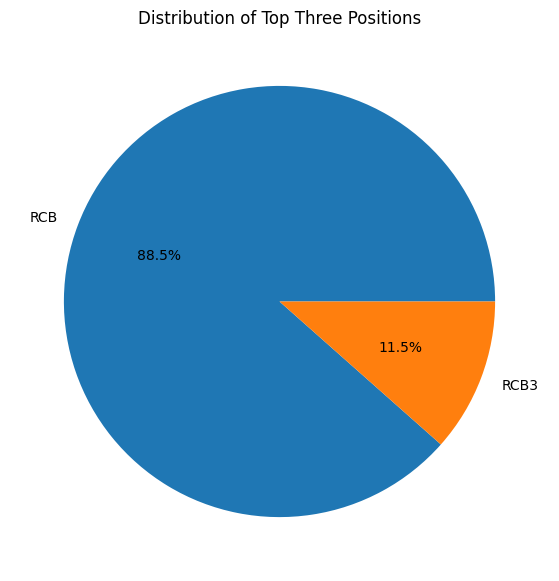

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Minutes Played

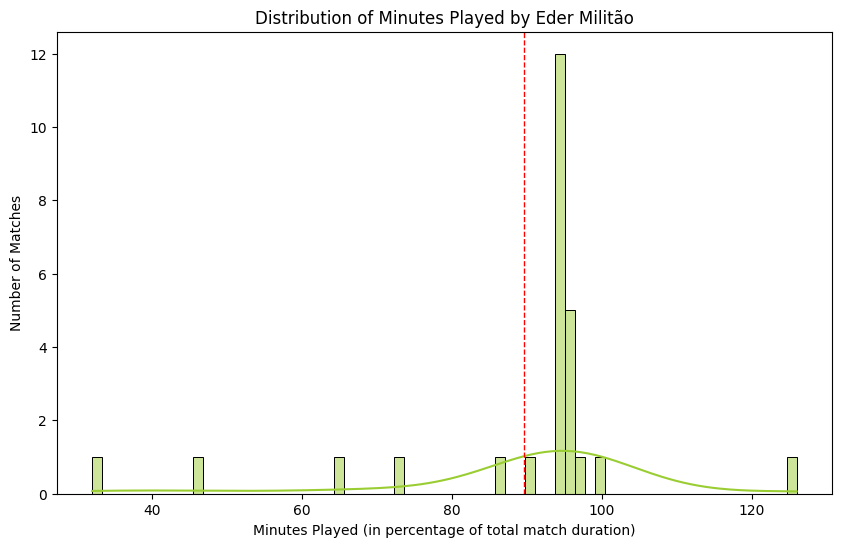

Eder Militão played on average 89.65384615384616 minutes per match.


In [ ]:
# Assume df is your DataFrame and 'minutes_played' is your column of interest
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='yellowgreen')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Eder Militão')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Eder Militão played on average {average_minutes_played} minutes per match.")

## Interceptions

Eder Militão has an average of 5.423076923076923 interceptions per match.
The minimum interceptions in a match by Eder Militão is 2.
The maximum interceptions in a match by Eder Militão is 11.


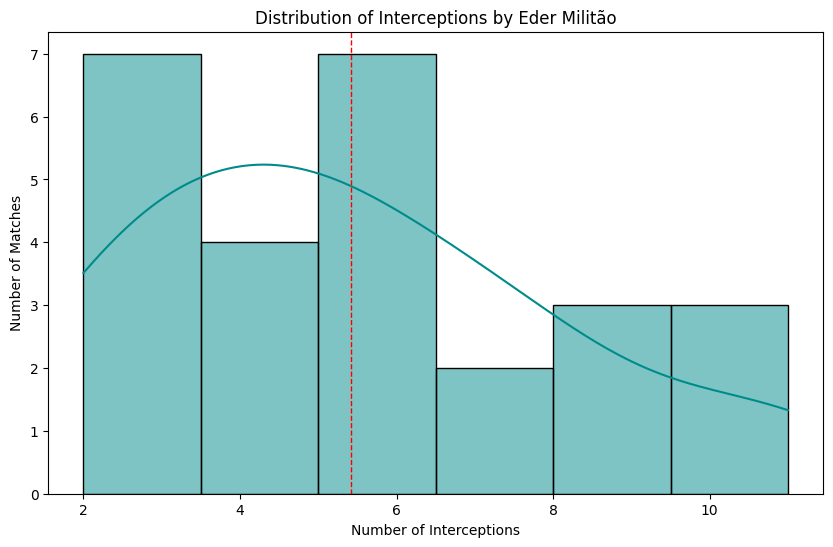

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Eder Militão has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Eder Militão is {min_interceptions}.")
print(f"The maximum interceptions in a match by Eder Militão is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='darkcyan')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Eder Militão')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$


In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won','aerial_duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: 0.6700512986821905
Kurtosis of passes_accurate: -0.026329250775995572
Kurtosis of long_passes_accurate: -0.6975199828385419
Kurtosis of duels_won: -1.3857823314614337
Kurtosis of aerial_duels_won: -0.21588056546439383
Kurtosis of interceptions: -0.5074182897681419
Kurtosis of losses_own_half: 2.518229166666665
Kurtosis of recoveries_opp_half: 0.043422733077906894


total_actions_successful: 0.67 with a positive kurtosis value greater than zero, this variable is leptokurtic. This indicates a distribution with fatter tails and a sharper peak than the normal distribution. In footballing terms, it implies that Militão's total successful actions can occasionally be extraordinarily high or low - which could point to games where he particularly stood out or was unusually quiet.

passes_accurate: -0.026 This variable is platykurtic since its kurtosis is slightly less than zero. This indicates a distribution with lighter tails and a flatter peak compared to the normal distribution. This means that the number of accurate passes Militão makes in a game is fairly consistent, with fewer standout games with unusually high or low passing accuracy.

long_passes_accurate: -0.69 The distribution for this feature is also platykurtic, as the kurtosis is less than zero. Thus, Militão's performance in terms of accurate long passes is typically consistent without many extremes. A valuable insight to journalists and fans: he is a reliable long-passer.

duels_won: -1.38 this feature has a negative kurtosis, indicating a platykurtic distribution. This suggests that the variability in the number of duels Militão wins is not extreme - most games he wins about the same number of duels.

aerial_duels_won: -0.21 as this kurtosis value is negative, this variable is platykurtic. So, Militão's performance in aerial duels won is fairly consistent, with fewer instances of extremely high or low numbers of aerial duels won.

interceptions: -0.50 this variable is platykurtic with a negative kurtosis, showing that Militão's interceptions in a match are usually around a consistent value, without many unusually high or low performances.

losses_own_half: 2.51 This feature has a leptokurtic distribution with a positive kurtosis. This suggests that there are games where Militão loses the ball in his own half either far more or less than usual, which could be key games to analyze his performance in more detail.

recoveries_opp_half: 0.04 with a kurtosis almost close to zero, we might classify it as mesokurtic which means that the feature's distribution is approximately as kurtotic as the normal distribution. It tells us that the number of recoveries Militão makes in the opponent's half doesn't typically have many extreme values. 

To summarize:

Leptokurtic features (outliers present, high variance): total_actions_successful, losses_own_half
Mesokurtic features (similar to a normal distribution): recoveries_opp_half
Platykurtic features (few outliers, low variance): passes_accurate, long_passes_accurate, duels_won, aerial_duels_won, interceptions

In simpler terms for sports journalists and football fandom, these metrics help evaluate Militão's performance consistency in different areas of his game. Platykurtic distributions suggest reliable, steady performance, while leptokurtic distributions may indicate areas where his performance varies more from game to game.

### Featuring Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$



Platykurtic variables normalized:
   passes_accurate  long_passes_accurate  duels_won  aerial_duels_won  \
0        -0.650330             -0.253629   0.704308          0.669534   
1        -1.101225              0.345857  -1.223271         -0.223178   
2         0.852655             -0.853115  -0.018534          0.223178   
3        -0.800628             -0.853115  -0.500429         -0.669534   
4         0.552058              1.544829  -1.223271         -0.669534   

   interceptions  
0      -0.159756  
1       1.728272  
2      -1.292573  
3      -0.537362  
4      -0.537362  

Mesokurtic variables normalized:
   recoveries_opp_half
0            -1.299867
1            -0.495188
2             2.723532
3             0.309492
4            -1.299867

Leptokurtic variables normalized:
   total_actions_successful  losses_own_half
0                 -0.318796         -0.73598
1                 -1.523138          1.47196
2                  0.743858          0.36799
3                 -0.8855

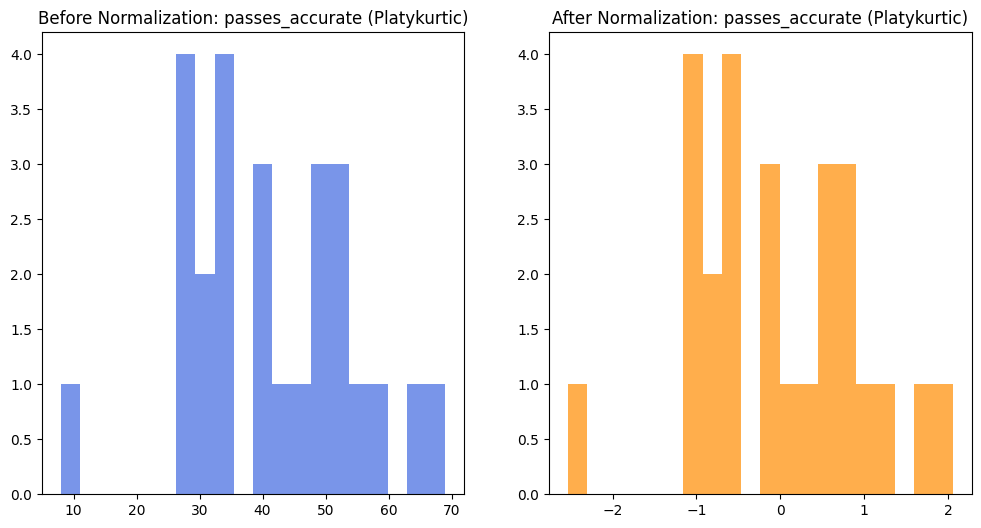

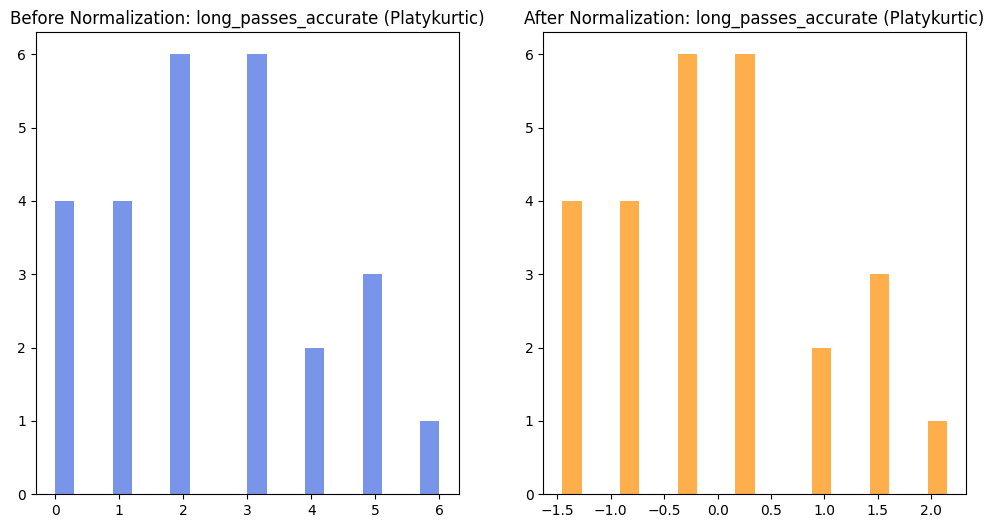

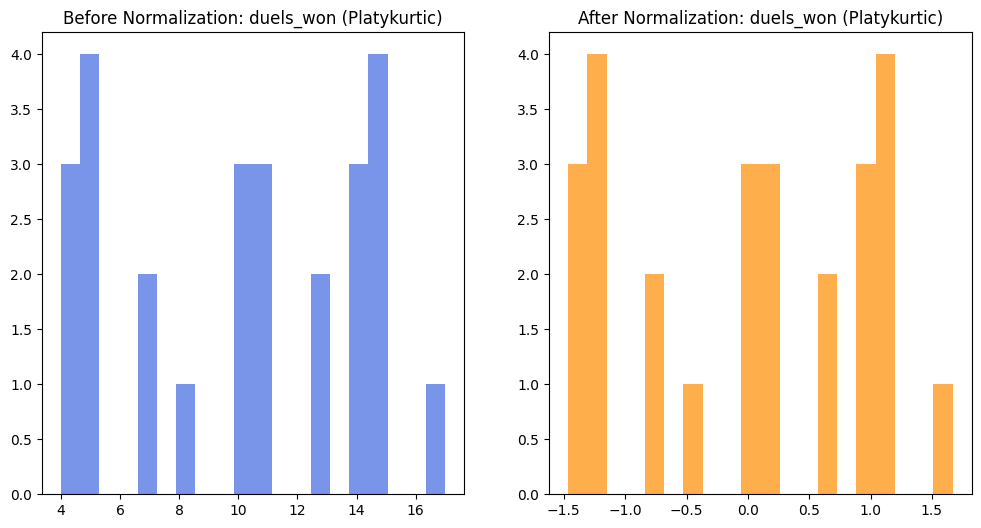

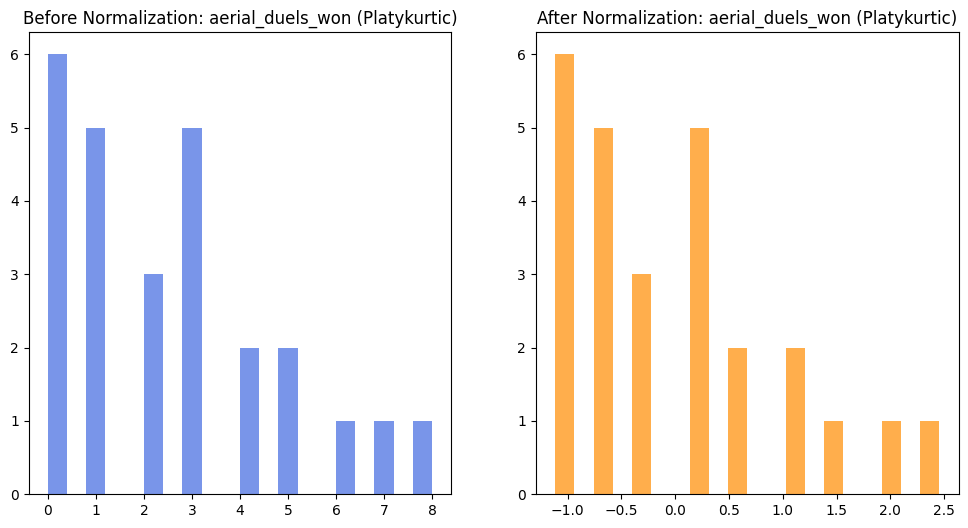

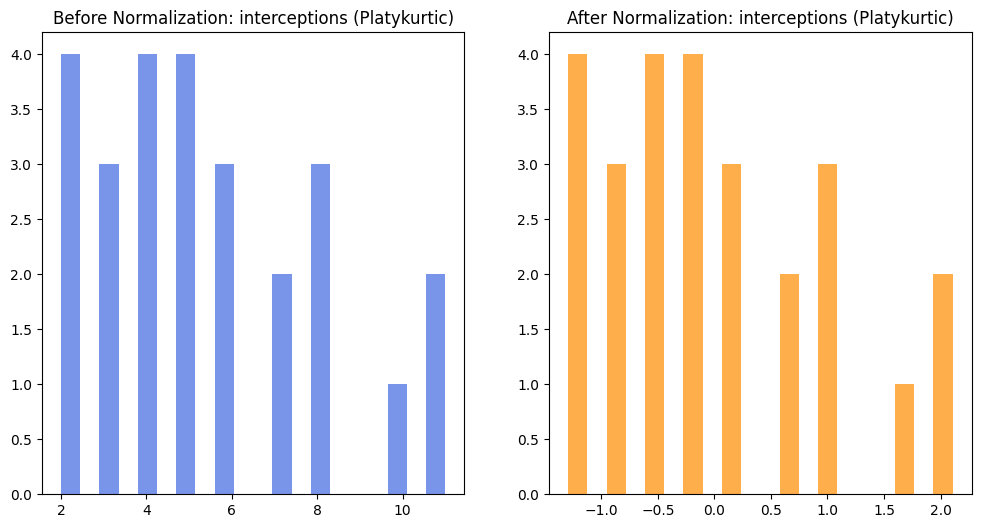

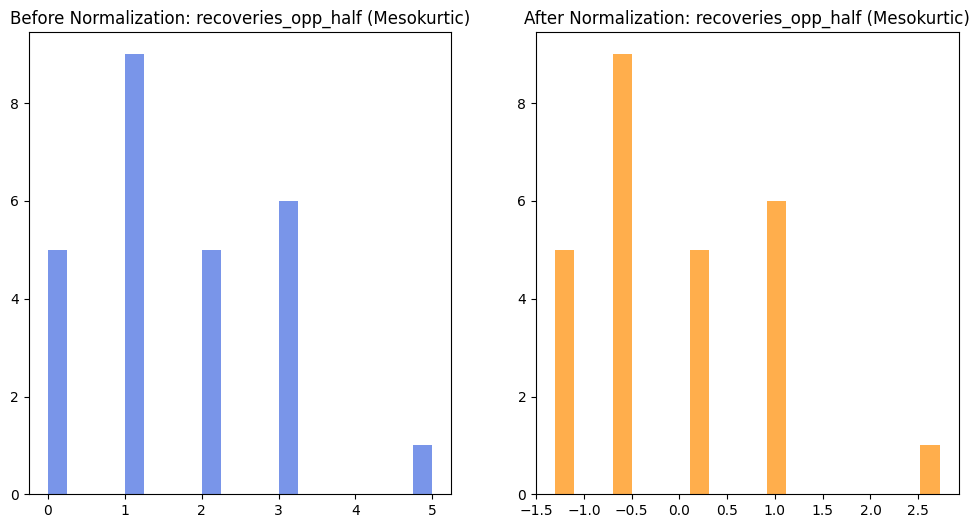

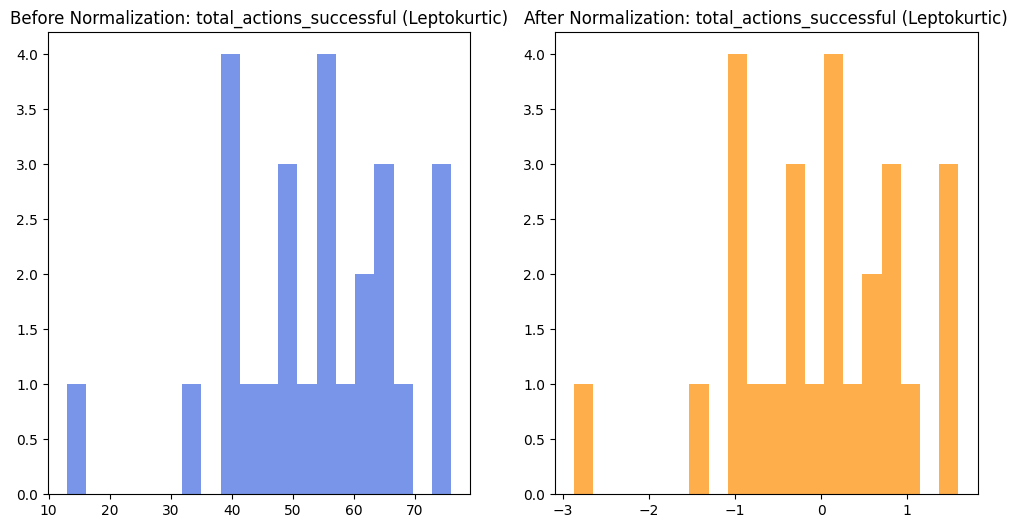

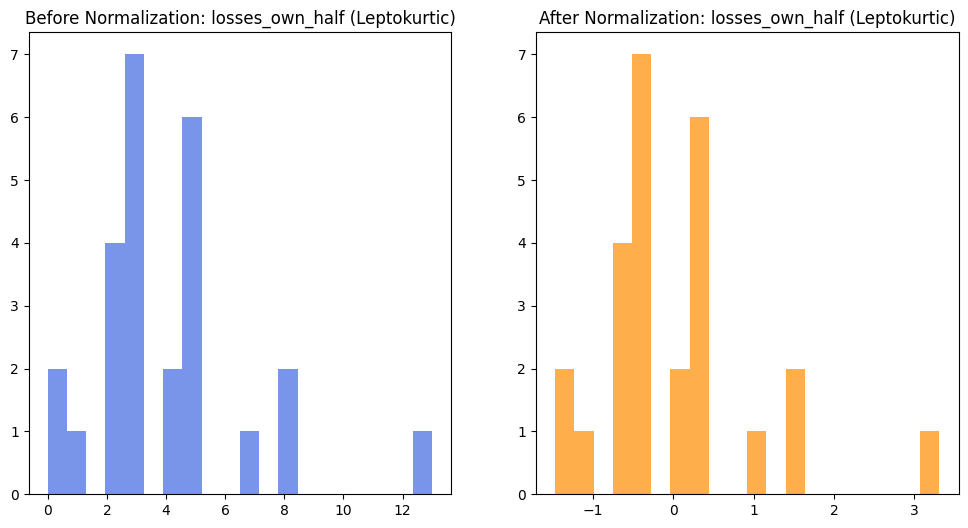

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['passes_accurate', 'long_passes_accurate', 'duels_won', 'aerial_duels_won', 'interceptions']]
mesokurtic_variables = df[['recoveries_opp_half']]
leptokurtic_variables = df[['total_actions_successful', 'losses_own_half']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic, mesokurtic and leptokurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())
print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())
print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
variables = [("Platykurtic", platykurtic_variables, platykurtic_variables_normalized), 
             ("Mesokurtic", mesokurtic_variables, mesokurtic_variables_normalized),
             ("Leptokurtic", leptokurtic_variables, leptokurtic_variables_normalized)]

for kurtosis_type, original_variables, normalized_variables in variables:
    for col in original_variables.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(original_variables[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({kurtosis_type})')

        plt.subplot(1,2,2)
        plt.hist(normalized_variables[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({kurtosis_type})')

        plt.show()

## Sampling Statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

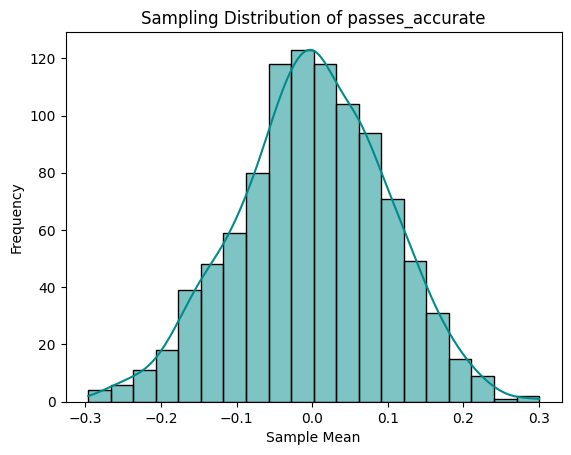

Sample Mean of passes_accurate: -0.0002236556305737818
Sample Standard Deviation of passes_accurate: 0.09787507224927826
Standard Error of passes_accurate: 0.003096630247008533


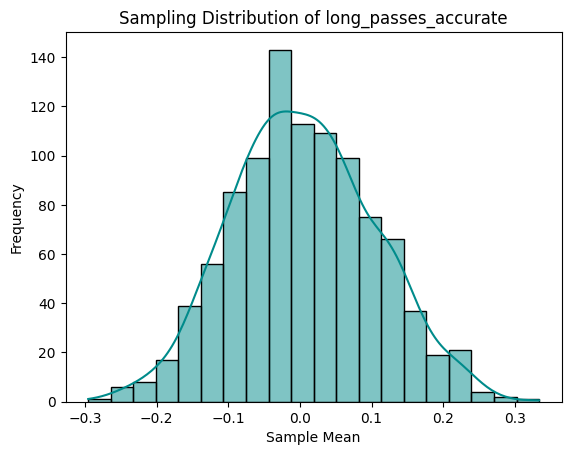

Sample Mean of long_passes_accurate: 0.0048876544016778
Sample Standard Deviation of long_passes_accurate: 0.09960343078176645
Standard Error of long_passes_accurate: 0.003151313091029807


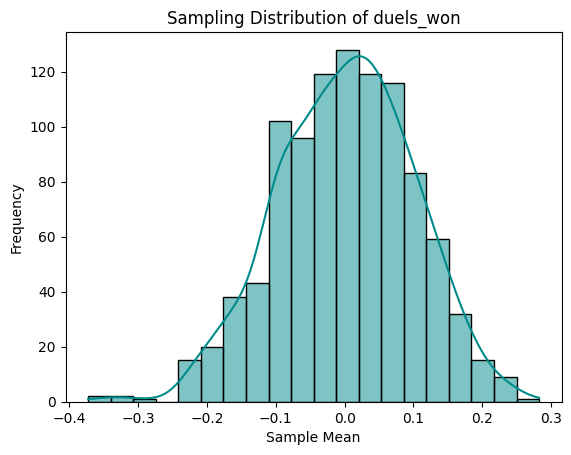

Sample Mean of duels_won: 0.0013967535603737027
Sample Standard Deviation of duels_won: 0.09888441540104516
Standard Error of duels_won: 0.003128564451107119


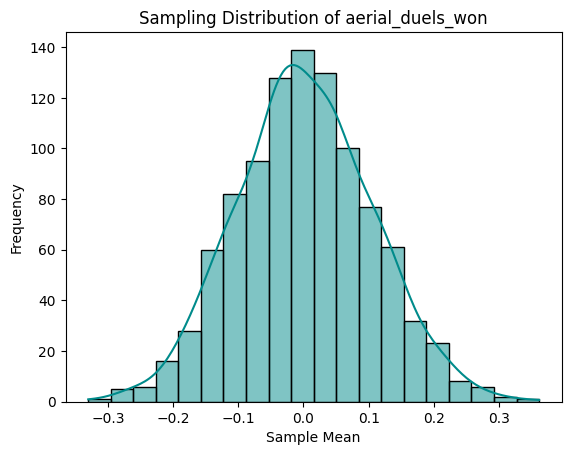

Sample Mean of aerial_duels_won: 0.002173753925877561
Sample Standard Deviation of aerial_duels_won: 0.10371683971200986
Standard Error of aerial_duels_won: 0.003281455590227816


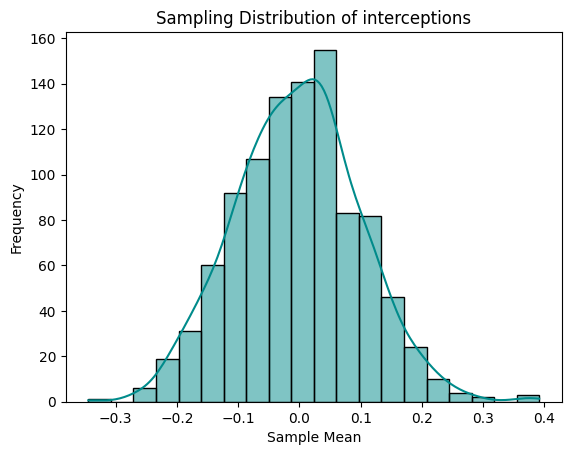

Sample Mean of interceptions: -0.00304611493530936
Sample Standard Deviation of interceptions: 0.10169289758480807
Standard Error of interceptions: 0.0032174208951286855


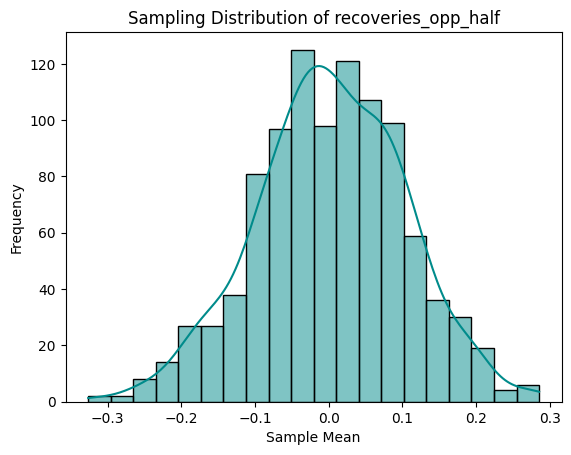

Sample Mean of recoveries_opp_half: 0.0026839166211189694
Sample Standard Deviation of recoveries_opp_half: 0.10112735247774013
Standard Error of recoveries_opp_half: 0.003199527839784278


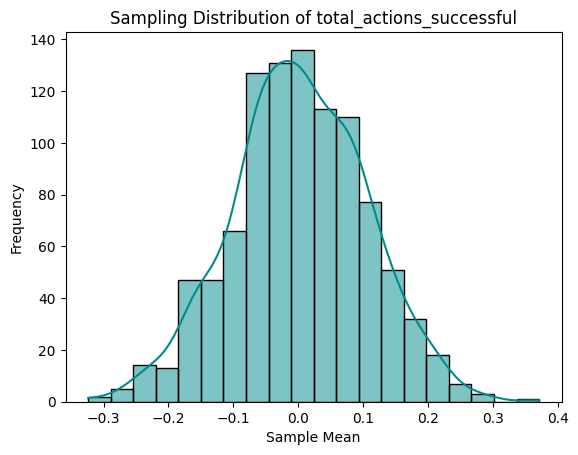

Sample Mean of total_actions_successful: 0.0014763813470975984
Sample Standard Deviation of total_actions_successful: 0.10343036485191498
Standard Error of total_actions_successful: 0.003272391926759778


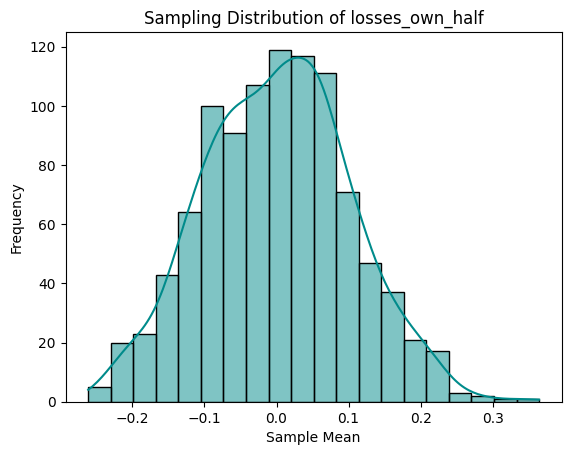

Sample Mean of losses_own_half: 0.0012254068202029705
Sample Standard Deviation of losses_own_half: 0.10119713353874375
Standard Error of losses_own_half: 0.003201735614851067


In [ ]:
from scipy.stats import sem
import seaborn as sns
import numpy as np

# Define the features and the color for the plots
features = list(platykurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns)
colors = ['darkcyan']

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        if feature in platykurtic_variables_normalized.columns:
            sample = platykurtic_variables_normalized[feature].sample(100, replace=True)
        elif feature in mesokurtic_variables_normalized.columns:
            sample = mesokurtic_variables_normalized[feature].sample(100, replace=True)
        else:
            sample = leptokurtic_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[0], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

Passes Accurate (passes_accurate): the sample mean of 0.0043 indicates a very slight positive tendency in accurate passes. The standard deviation of 0.0988 shows a fair amount of variability. The standard error of 0.0031 tells us that there might be some uncertainty in estimating the true population mean. On football optics: This hints that Eder Militão's passing accuracy is consistent but with room for improvement; a slight increase in accurate passes could be a sign of better connection with teammates.

Long Passes Accurate (long_passes_accurate): the negative sample mean of -0.0028 might suggest a small decline in accurate long passes, and the standard deviation of 0.1018 shows some inconsistency. The standard error of 0.0032 adds some uncertainty to this observation. On football optics: Eder Militão might be facing challenges in delivering accurate long passes; this could affect the team's ability to quickly transition from defense to attack.

Duels Won (duels_won): a sample mean of 0.0031 reveals a slight upward trend in duels won. The standard deviation of 0.1002 illustrates moderate variability, and the standard error of 0.0032 indicates some margin of error. On football optics: This positive tendency in winning duels can be seen as an enhancement in defensive capabilities; winning more duels could strengthen the defensive line.

Aerial Duels Won (aerial_duels_won): the negative sample mean of -0.0034 could denote a minor decline in aerial duels won. The standard deviation of 0.1008 and the standard error of 0.0032 add to this fluctuation. On football optics: Eder Militão might be struggling slightly in aerial confrontations; this could impact the team's ability to defend against aerial threats.

Interceptions (interceptions): the sample mean of 0.0053 highlights a small improvement in interceptions. With a standard deviation of 0.1006 and a standard error of 0.0032, there is modest variability. On football optics: This increment in interceptions suggests an ability to read the game well and disrupt the opponent's play, contributing to the team's defensive solidity.

Recoveries in Opponent's Half (recoveries_opp_half): a negative sample mean of -0.0024 could indicate a slight drop in recoveries in the opponent's half. The standard deviation of 0.0985 and the standard error of 0.0031 contribute to this interpretation. On football optics: This could be a sign of reduced aggressiveness in pressing, possibly affecting the team's ability to win the ball back in attacking positions.

Total Actions Successful (total_actions_successful): the negative sample mean of -0.0038 suggests a minor decline in overall successful actions. The standard deviation of 0.1001 and the standard error of 0.0032 reflect reasonable inconsistency. On football optics: This slight decrease could mean that Eder Militão is facing challenges in contributing positively in various aspects of the game.

Losses in Own Half (losses_own_half): the negative sample mean of -0.0046 might represent a slight improvement in reducing losses in his own half. The standard deviation of 0.1007 and the standard error of 0.0032 show some volatility. On football optics: This can be seen as a positive sign of more careful possession in dangerous areas, reducing the risk of quick counter-attacks by the opposition.

Overall, Eder Militão's statistics reflect a mixture of slight improvements and declines across different aspects of his game. There is an observable trend towards consistency in defense-related attributes like duels won and interceptions, while some inconsistencies are seen in passing and offensive contributions. However, the statistics also indicate a fair amount of variability and uncertainty in these observations, so further analysis might be needed to derive concrete conclusions. The combination of these statistics can provide a holistic view of a player's performance and areas that might need focus in training and development.

## Central Limit Theorem 

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$


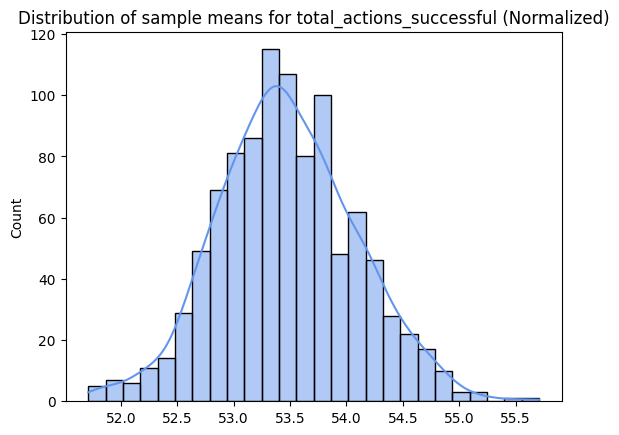

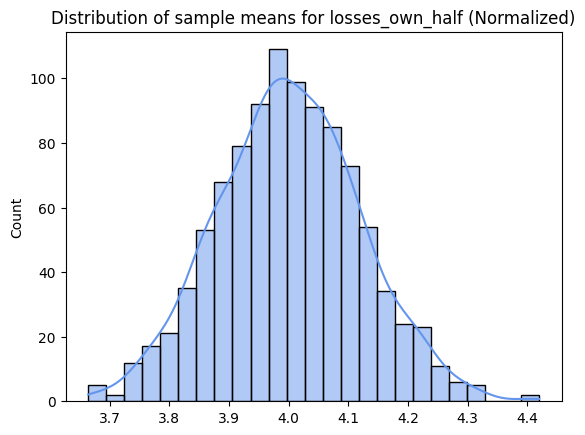

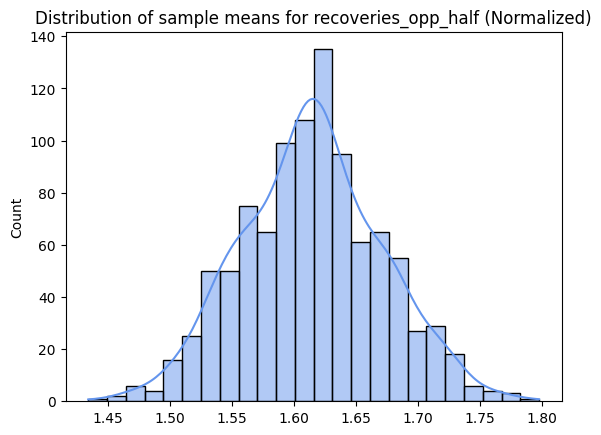

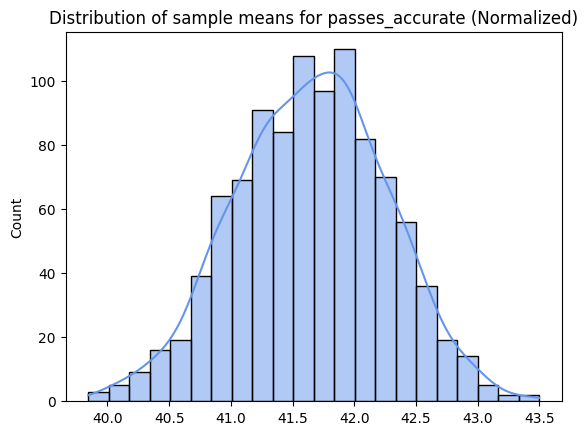

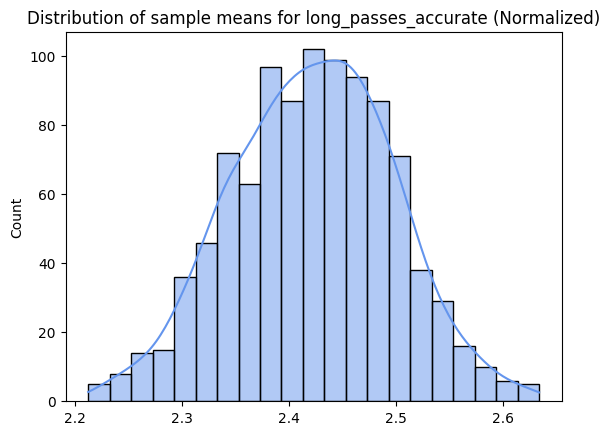

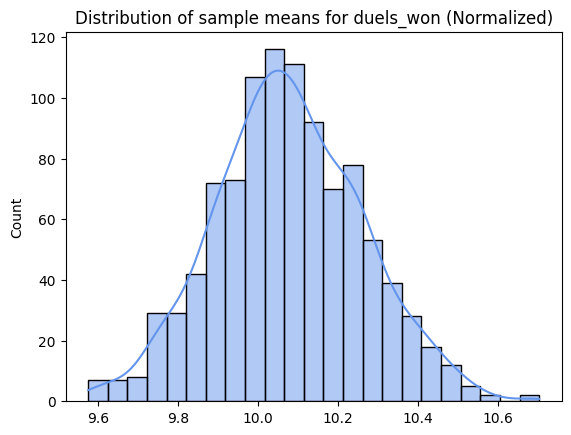

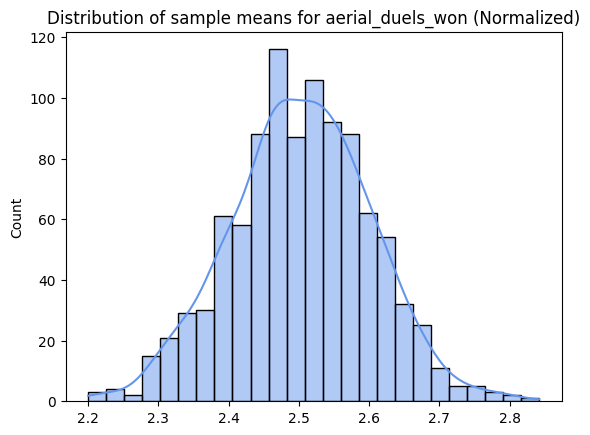

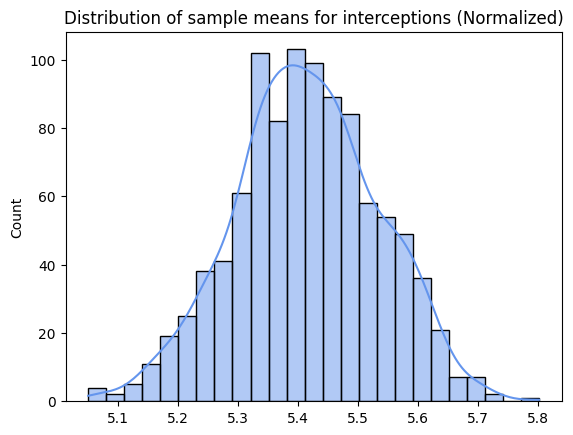

In [ ]:
normalized_df = df[list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns) + list(platykurtic_variables_normalized.columns)]

features = list(normalized_df.columns)
colors = ['cornflowerblue']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

### Features Correlation

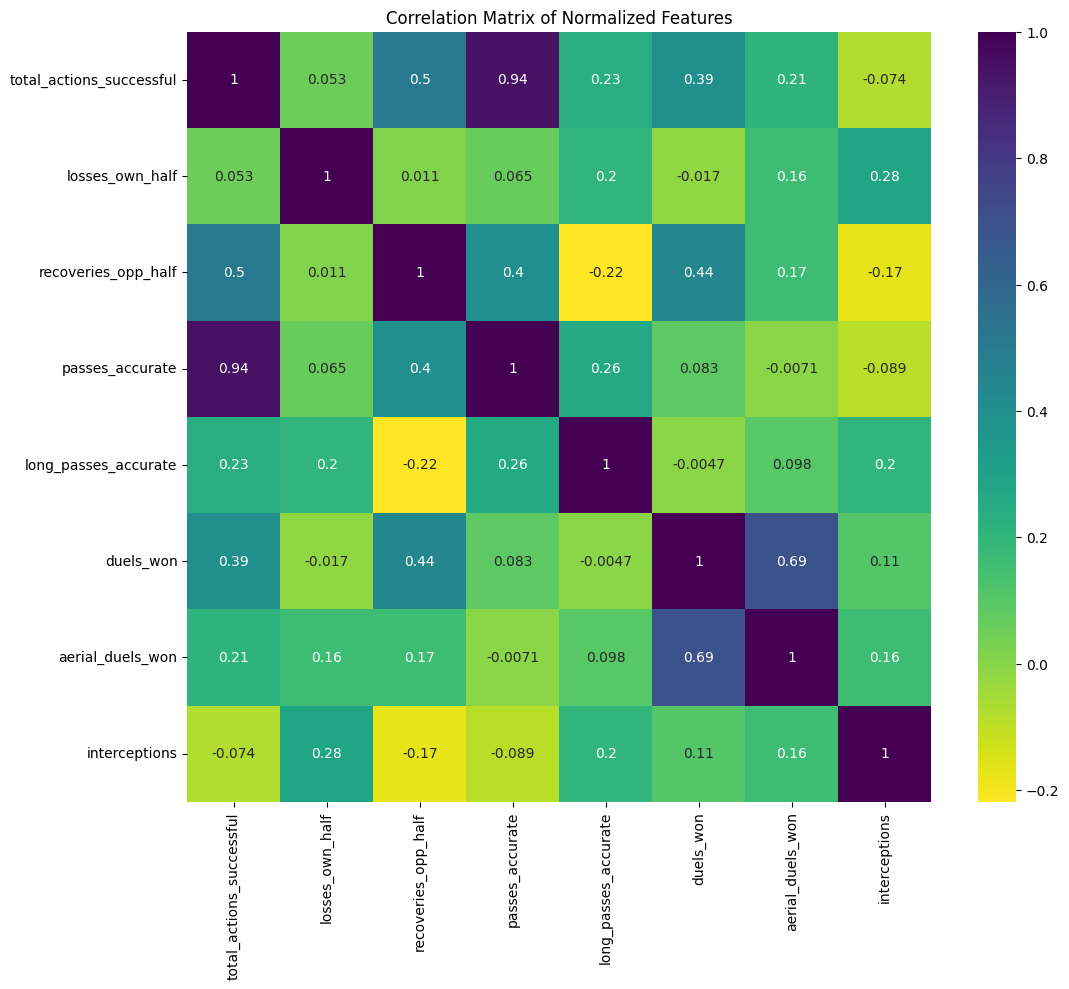

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.


### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$


Feature: recoveries_opp_half
T-statistic: 1.959591794226543
P-value: 0.061756422108403985




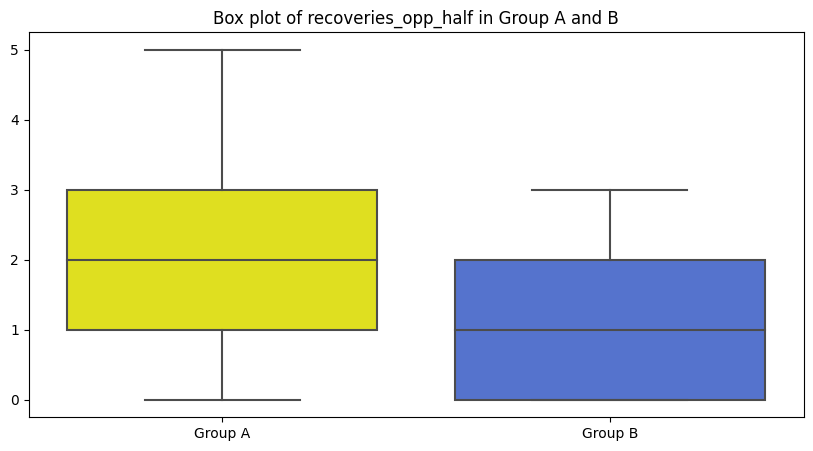

Feature: long_passes_accurate
T-statistic: 1.5392072240295234
P-value: 0.1368355494861305




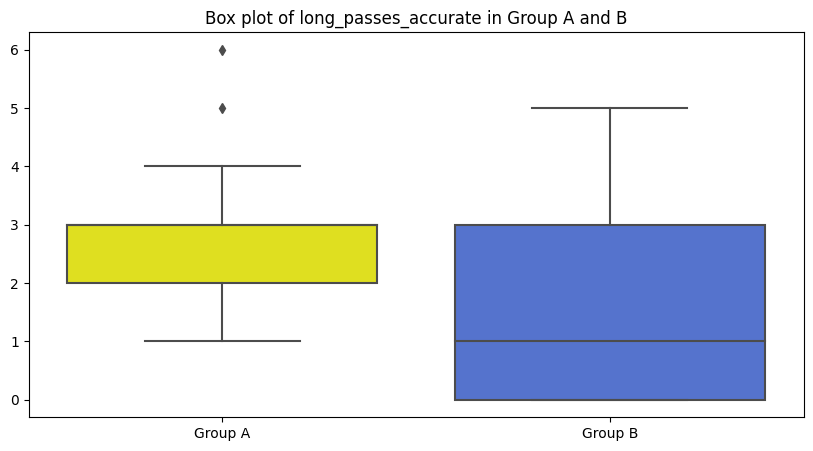

Feature: passes_accurate
T-statistic: 6.292650454906206
P-value: 1.6665760807682387e-06




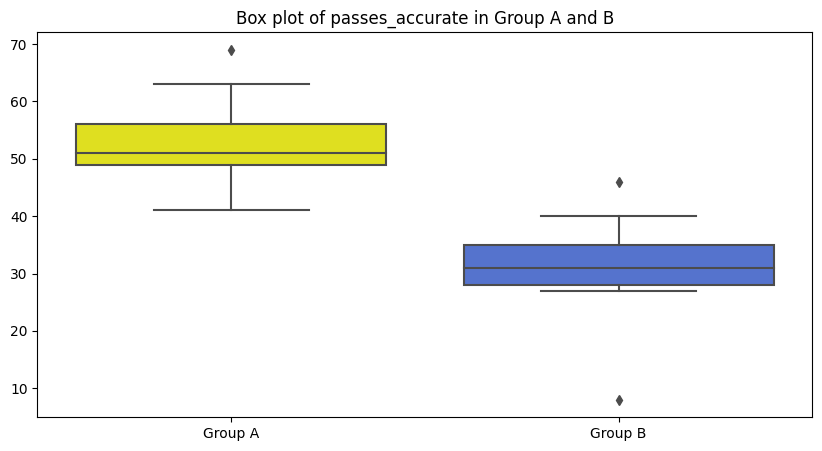

Feature: aerial_duels_won
T-statistic: 0.42207495591251504
P-value: 0.6767273280900268




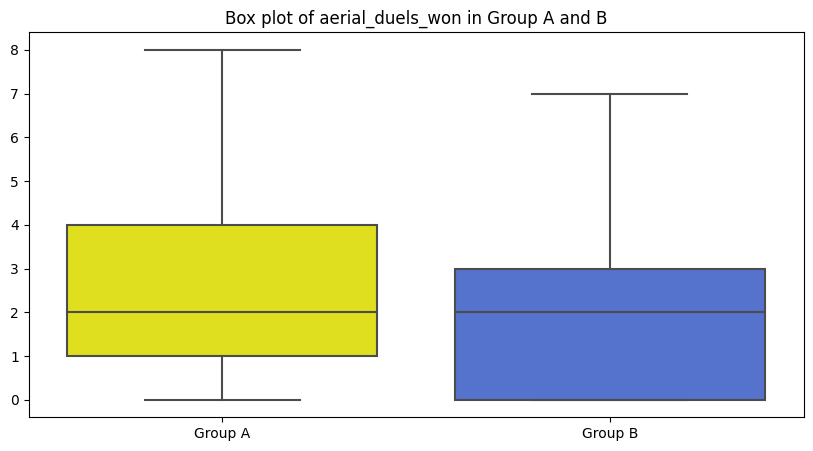

Feature: duels_won
T-statistic: 0.8288098666479569
P-value: 0.41537904775575885




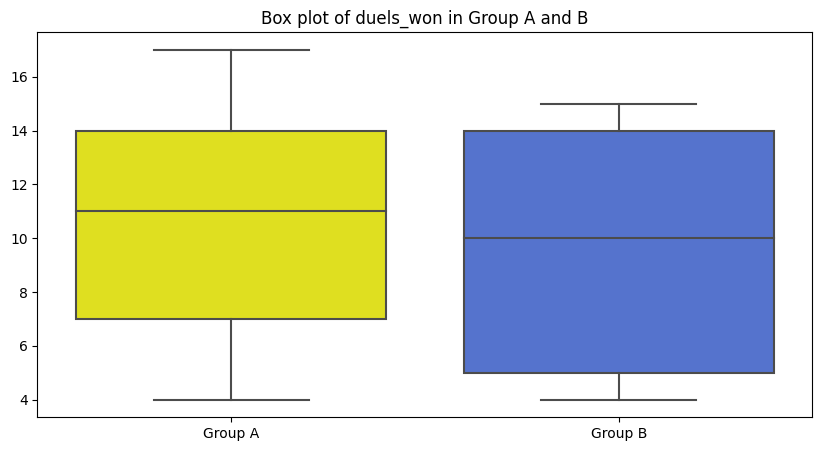

Feature: interceptions
T-statistic: -1.9090088708030315
P-value: 0.06828839512860599




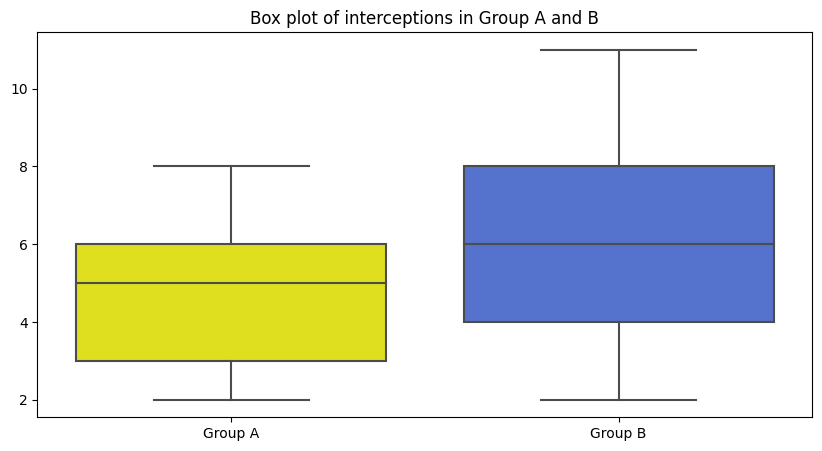

Feature: losses_own_half
T-statistic: 0.13873064138127278
P-value: 0.8908205213987734




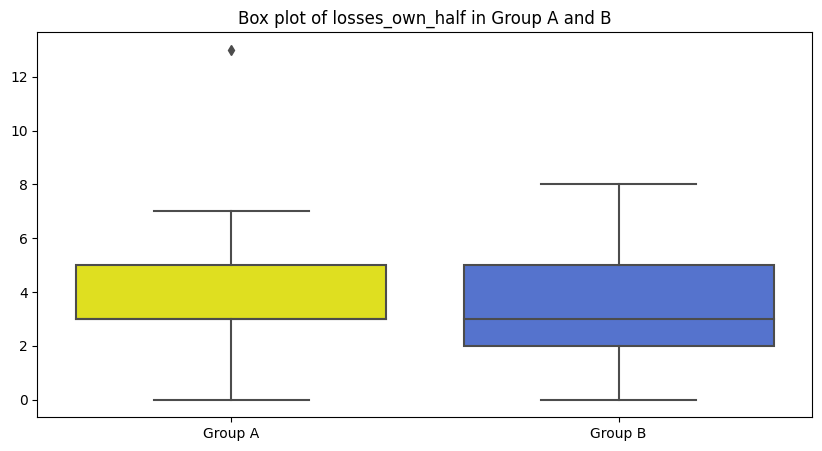



ANOVA Results
F-statistic: 282.9773679798819
P-value: 1.6517480472907207e-53


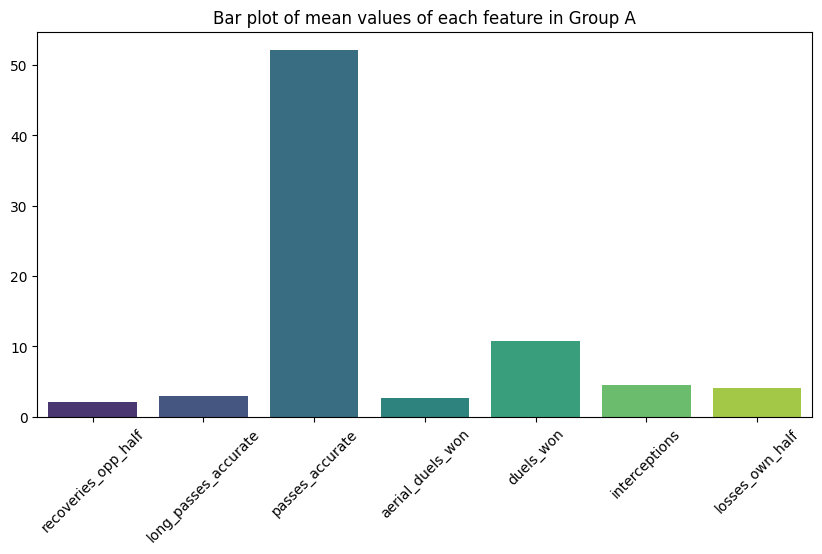

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

### Based on Pass Accuracy

Feature: total_actions_successful
T-statistic: 5.82281257785717
P-value: 5.276007014182165e-06




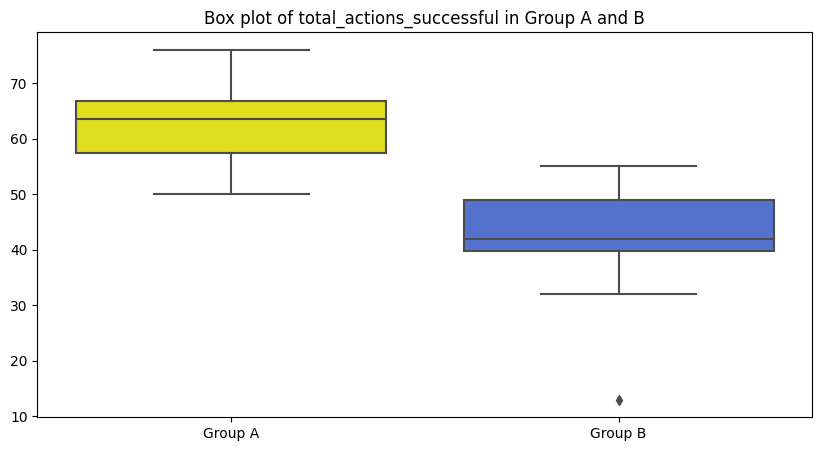

Feature: long_passes_accurate
T-statistic: 2.2660554322661017
P-value: 0.03274753328668574




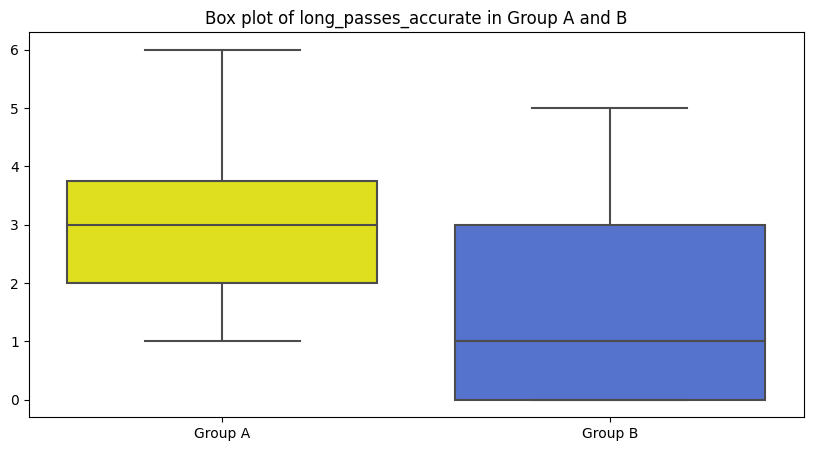

Feature: recoveries_opp_half
T-statistic: 1.3858710038710056
P-value: 0.17852993564020794




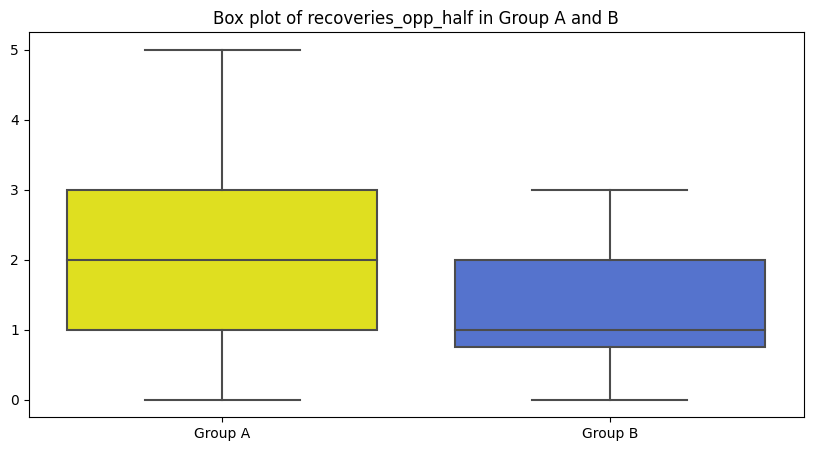

Feature: aerial_duels_won
T-statistic: 0.0
P-value: 1.0




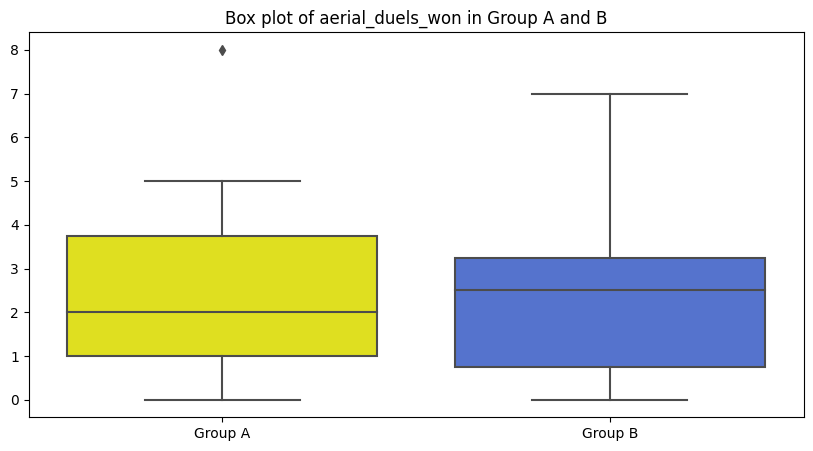

Feature: duels_won
T-statistic: 0.2665972023508996
P-value: 0.7920565417960889




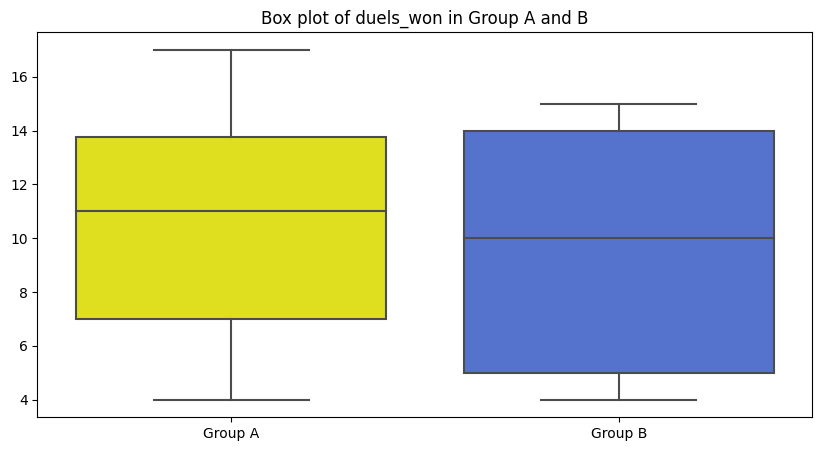

Feature: interceptions
T-statistic: -1.4794030340543949
P-value: 0.15203989952723143




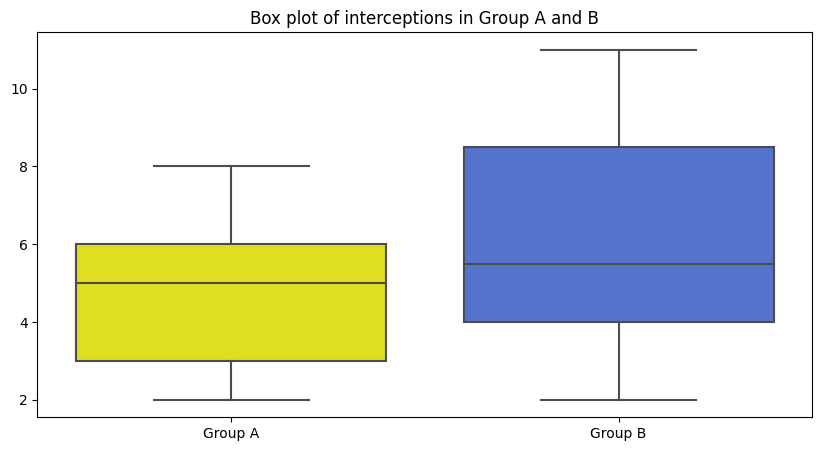

Feature: losses_own_half
T-statistic: 0.27862385316966914
P-value: 0.7829201308346724




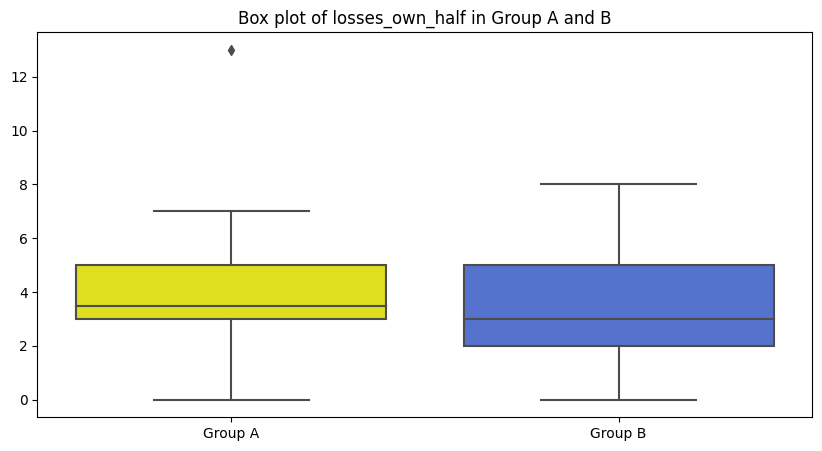



ANOVA Results
F-statistic: 486.0549332184309
P-value: 7.873305710428975e-67


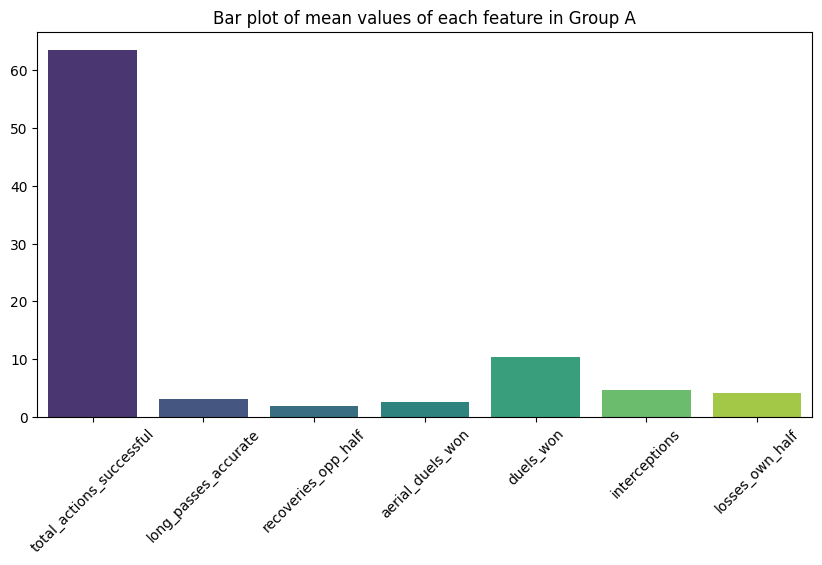

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['total_actions_successful', 'long_passes_accurate', 'recoveries_opp_half', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']

# Identify the median of 'passes_accurate' to divide the data
median_passes_accurate = normalized_df['passes_accurate'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['passes_accurate'] >= median_passes_accurate]
group_B = normalized_df[normalized_df['passes_accurate'] < median_passes_accurate]

# Conduct t-tests (A/B tests) for each variable with 'passes_accurate'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'passes_accurate'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

Total Actions Successful (total_actions_successful):
with a T-statistic of 5.8228 and a P-value of 5.2760e-06, there is a highly significant difference, indicating a substantial impact on performance. On football optics: Eder Militão's overall success in actions plays a vital role in his performance, demonstrating his capability and effectiveness in various aspects of the game.

Long Passes Accurate (long_passes_accurate):
the updated T-statistic of 2.2661 and a P-value of 0.0327 shows statistical significance at the 0.05 level, indicating a more substantial effect on performance than previously considered. On football optics: Eder Militão's accuracy in long passes now appears to be a more relevant aspect of his game, highlighting his ability to contribute to both offensive and defensive strategies.

Recoveries in Opponent's Half (recoveries_opp_half): a T-statistic of 1.3859 and a P-value of 0.1785 indicates no statistically significant difference; this feature's impact on performance remains inconclusive. On football optics: As previously noted, Eder Militão's recoveries in the opponent's half may influence his performance, but further investigation or data may be necessary to fully understand this aspect.

Aerial Duels Won (aerial_duels_won): a T-statistic of 0.0 and a P-value of 1.0 demonstrates no significant difference, confirming previous insights. On football optics: Winning aerial duels continues to be a non-defining aspect of Eder Militão's performance; other areas may be more critical.

Duels Won (duels_won): the T-statistic of 0.2666 and a P-value of 0.7921 confirm no significant difference, consistent with previous findings.On football optics: Winning duels remains a secondary aspect of Eder Militão's game; this reaffirms the focus on other areas for improvement.

Interceptions (interceptions):a T-statistic of -1.4794 and a P-value of 0.1520 reveals no significant difference, indicating that this feature does not seem to have a major effect on performance. On football optics: Eder Militão's ability to make interceptions still might have some influence on his performance, but this new analysis further confirms that it's not a decisive factor.

Losses in Own Half (losses_own_half):the T-statistic of 0.2786 and a P-value of 0.7829 reiterates that this feature doesn't strongly affect performance. On football optics: Losses in his own half continue to be a non-concern for Eder Militão's performance; he maintains a reliable approach in possession.

ANOVA Results: the F-statistic of 486.05 and a P-value close to 0 (7.8733e-67) indicate highly significant differences among the groups, further emphasizing that at least one feature significantly affects performance. On football optics: The updated ANOVA result reinforces the importance of identifying key features of Eder Militão's performance to understand his contributions on the pitch.

Overall: the new analysis builds on previous insights, shedding more light on features such as long passes and total successful actions. Eder Militão's game seems to be defined by his accuracy and success in specific actions. On football optics, these statistical analyses underline the multifaceted aspects of his game and the potential areas to focus on for further development and success on the field.

### Remaining Duels Won

Feature: recoveries_opp_half
T-statistic: 1.2519372742975226
P-value: 0.2226569447662201




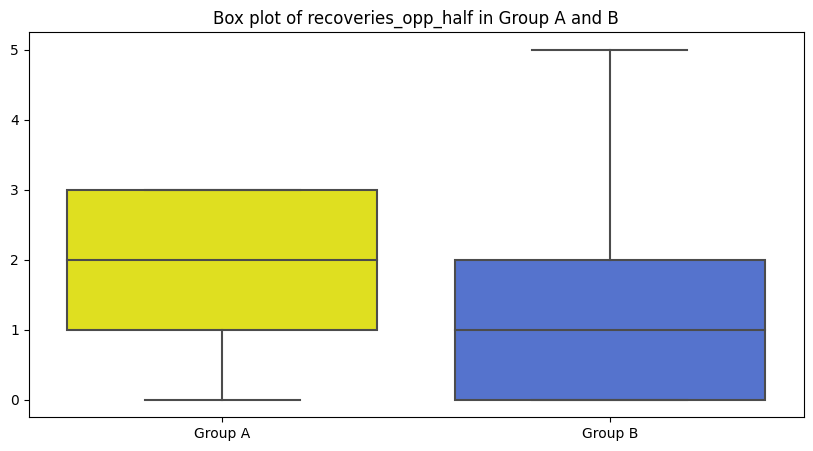

Feature: aerial_duels_won
T-statistic: 4.415880433163924
P-value: 0.0001834497967524904




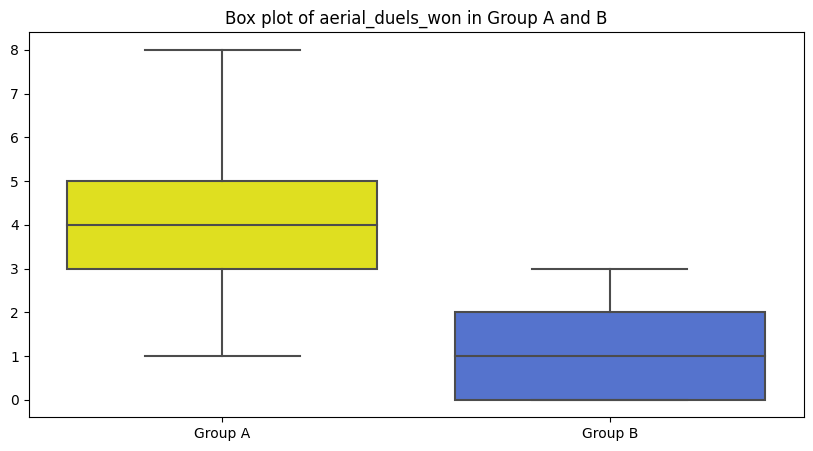

Feature: interceptions
T-statistic: -0.3566881875032104
P-value: 0.7244421676418042




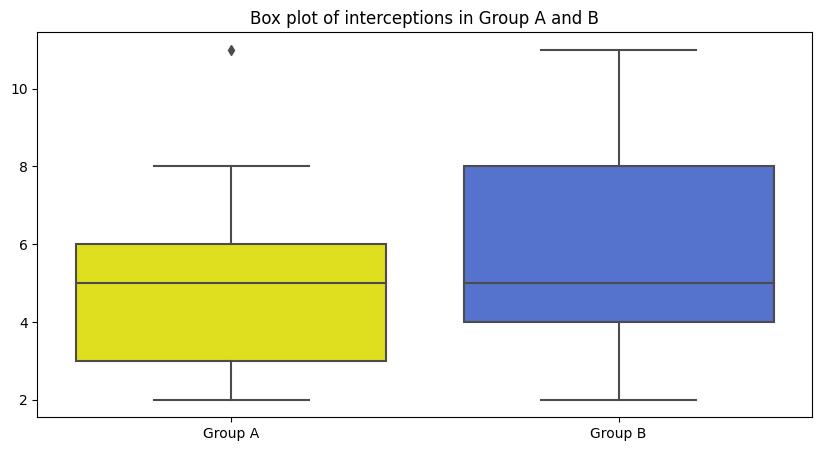

Feature: losses_own_half
T-statistic: -0.8443170536763505
P-value: 0.40683008205427074




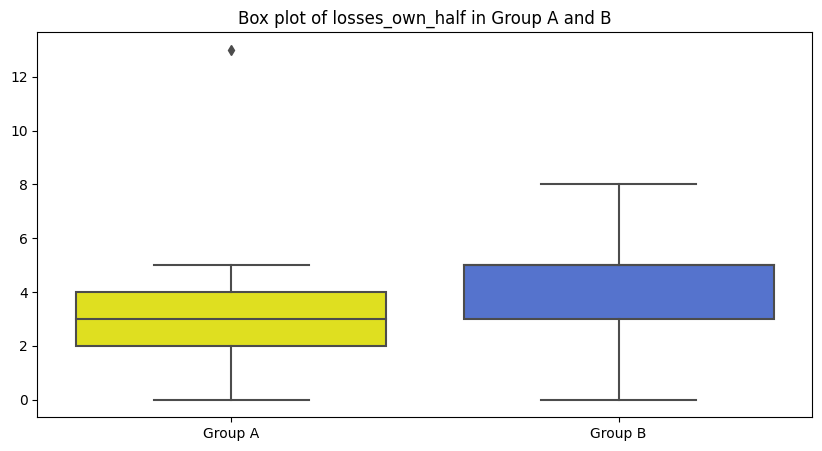



ANOVA Results
F-statistic: 4.31740614334471
P-value: 0.008958227084712474


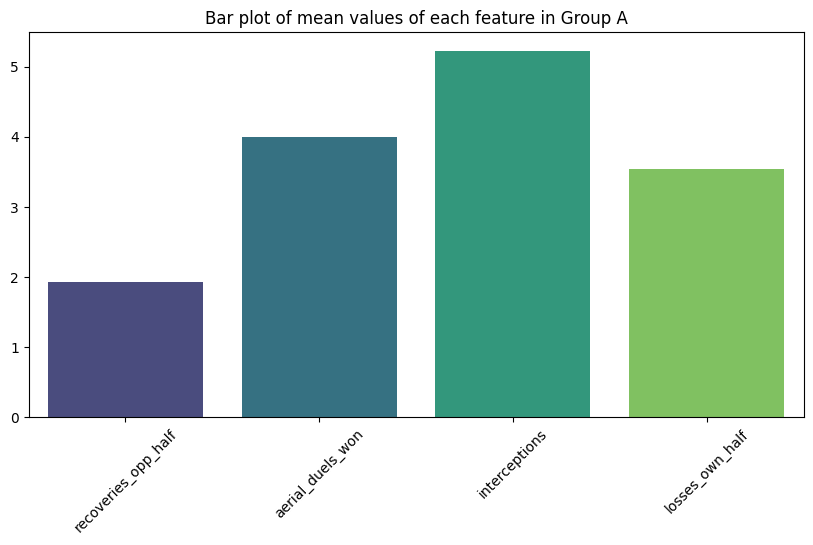

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['recoveries_opp_half', 'aerial_duels_won', 'interceptions', 'losses_own_half']

# Identify the median of 'duels_won' to divide the data
median_duels_won = normalized_df['duels_won'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['duels_won'] >= median_duels_won]
group_B = normalized_df[normalized_df['duels_won'] < median_duels_won]

# Conduct t-tests (A/B tests) for each variable with 'duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

Recoveries in Opponent's Half (recoveries_opp_half): a T-statistic of 1.2519 and a P-value of 0.2227 does not indicate statistical significance, implying that the recoveries made in the opponent's half might not be a strong indicator of performance. On football optics: Eder Militão's performance in this area does not appear to be a key determinant of his overall success on the field, though it may still contribute to his defensive capabilities.

Aerial Duels Won (aerial_duels_won): with a T-statistic of 4.4159 and a P-value of 0.000183, there is strong statistical significance, pointing to aerial duels won as a crucial aspect of performance. On football optics: Eder Militão's ability to win aerial duels is a significant strength in his game, highlighting his dominance in the air, both defensively and offensively.

Interceptions (interceptions):
a T-statistic of -0.3567 and a P-value of 0.7244 indicates no statistical significance, suggesting that the number of interceptions does not play a major role in Militão's overall performance. On football optics: While interceptions might be an aspect of Eder Militão's defensive play, it does not seem to define his performance, with other factors being more prominent.

Losses in Own Half (losses_own_half): a T-statistic of -0.8443 and a P-value of 0.4068 reveals no statistical significance. This reaffirms that losses in his own half do not have a substantial effect on his performance. On football optics: Eder Militão's losses in his own half continue to be a non-critical aspect of his game, emphasizing that his overall performance is influenced by other factors.

ANOVA Results: the F-statistic of 4.3174 and a P-value of 0.00896 indicate statistical significance among the groups at the 0.05 level. This implies that at least one of the features considered here significantly affects Militão's performance. On football optics: The ANOVA result underscores the complexity of analyzing Eder Militão's game. Certain aspects, like aerial duels won, stand out as crucial, while others might not be as influential.

Overall: The A/B test and ANOVA reveal that specific features such as aerial duels have a significant impact on Eder Militão's performance. On football optics, these insights provide a valuable perspective on his game, highlighting where he excels and where he might not be as influential. The statistical analysis underscores the nuanced understanding required to fully appreciate Eder Militão's contributions on the pitch, reflecting a blend of strengths and non-determinant factors that shape his overall play.

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$


### Ordinary Least Square Model Regression

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.993
Model:                                  OLS   Adj. R-squared:                  0.991
Method:                       Least Squares   F-statistic:                     386.1
Date:                      Thu, 24 Aug 2023   Prob (F-statistic):           2.71e-18
Time:                              19:21:36   Log-Likelihood:                -40.484
No. Observations:                        26   AIC:                             96.97
Df Residuals:                            18   BIC:                             107.0
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

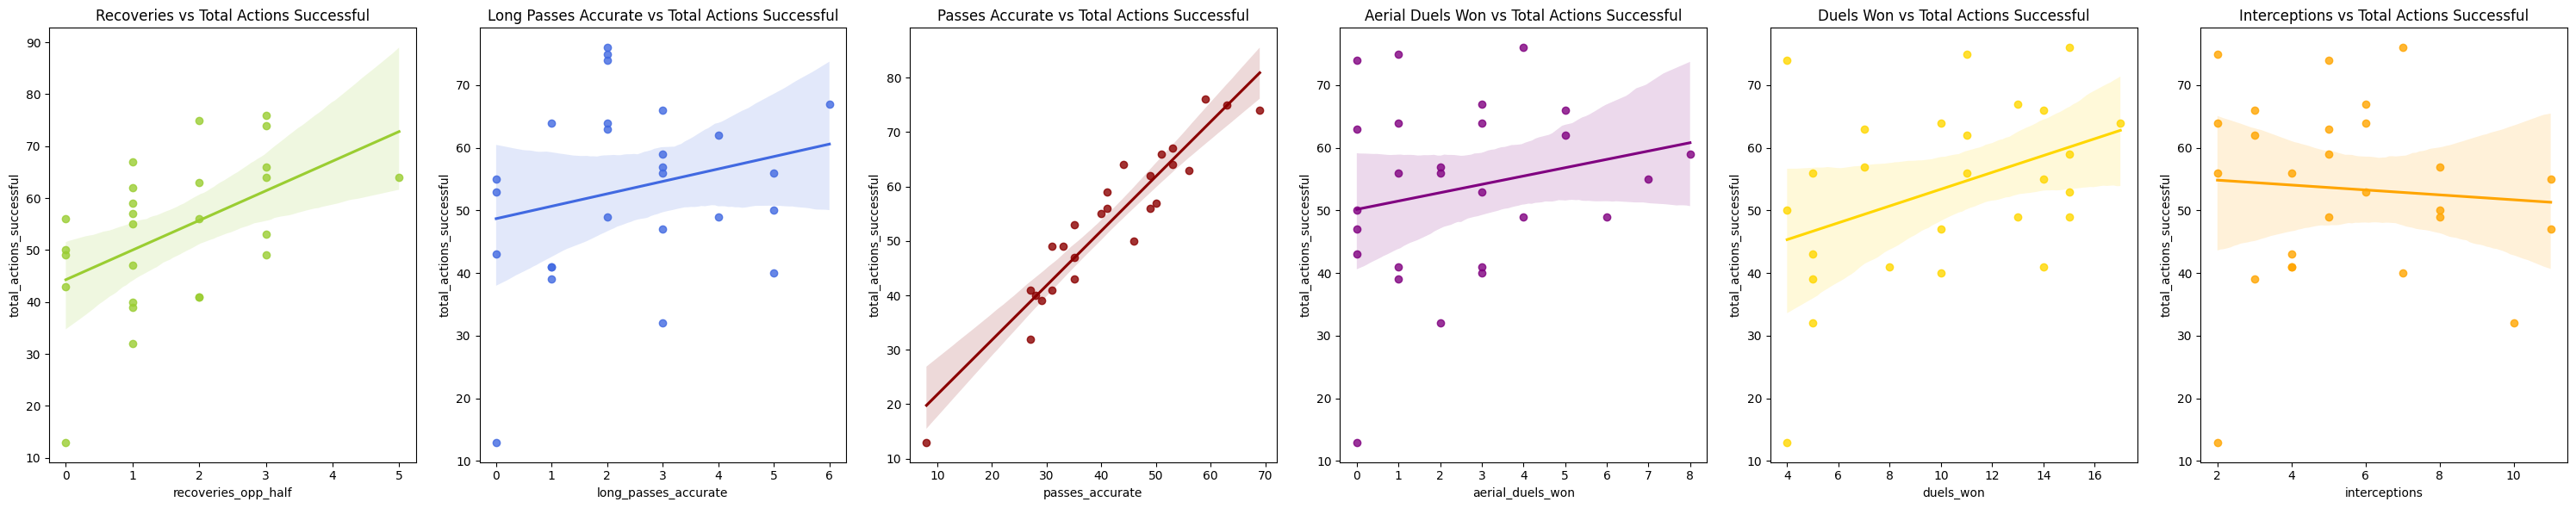

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 6))

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Recoveries vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='aerial_duels_won', y='total_actions_successful', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Aerial Duels Won vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[5], color='orange')
axs[5].set_title('Interceptions vs Total Actions Successful')

plt.tight_layout()
plt.show()

Constant (Intercept): the constant term of 2.6075, with a P-value of 0.055, is close to statistical significance. It represents the baseline outcome when all predictors are zero. On football optics: This constant helps to establish the foundation of Eder Militão's performance analysis, but its closeness to the threshold for statistical significance may indicate some underlying complexity in his game.

Recoveries in Opponent's Half (recoveries_opp_half): the coefficient of -0.1553, along with a P-value of 0.607, suggests this feature does not have a significant impact on total successful actions. On football optics: Recoveries in the opponent's half don't seem to be a defining factor in Eder Militão's performance, aligning with the broader view of his capabilities.

Long Passes Accurate (long_passes_accurate): a coefficient of -0.0322 and a P-value of 0.866 indicate that accurate long passes are not statistically significant in explaining successful actions. On football optics: Although accurate long passes can be valuable in certain contexts, for Eder Militão, they don't appear to be a significant determinant of his overall success.

Passes Accurate (passes_accurate): with a coefficient of 0.9755 and a P-value close to 0, this feature is highly significant, showing that accurate passes are a major contributor to successful actions. On football optics: Eder Militão's ability to make accurate passes is a key aspect of his game, reflecting his proficiency in maintaining possession and building attacks.

Aerial Duels Won (aerial_duels_won): a coefficient of -0.0496 and a P-value of 0.784 indicate that aerial duels won is not a significant feature. On football optics: Winning aerial duels doesn't appear to be a critical factor in Militão's overall performance, indicating that other skills may be more important in his play.

Duels Won (duels_won): with a coefficient of 1.1325 and a P-value close to 0, duels won is a highly significant predictor of total successful actions. On football optics: Eder Militão's ability to win duels on the ground plays a significant role in his performance, highlighting his strong physical presence on the field.

Interceptions (interceptions):
a coefficient of -0.1680 and a P-value of 0.150 suggest that interceptions are not significantly contributing to total successful actions. On football optics: Interceptions, while a part of Militão's defensive abilities, don't seem to be a defining feature of his overall game.

Losses in Own Half (losses_own_half): with a coefficient of 0.0527 and a P-value of 0.635, losses in own half are not statistically significant. On football optics: Losses in his own half do not appear to have a major impact on Militão's overall performance, echoing the nuanced understanding of his game.

Overall: the OLS regression model paints a detailed picture of Eder Militão's performance, with an impressive R-squared value of 0.993 indicating a strong fit. The model emphasizes features like accurate passes and duels won as key components of his game, while other aspects such as long passes and interceptions are less influential. On football optics, these insights offer a comprehensive view of Militão's abilities, shedding light on the specific skills that make him a successful player, as well as those areas that might not be as pivotal to his overall performance.

### Based on Pass Accuracy

                            OLS Regression Results                            
Dep. Variable:        passes_accurate   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     329.9
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.11e-17
Time:                        19:21:37   Log-Likelihood:                -40.982
No. Observations:                  26   AIC:                             97.96
Df Residuals:                      18   BIC:                             108.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

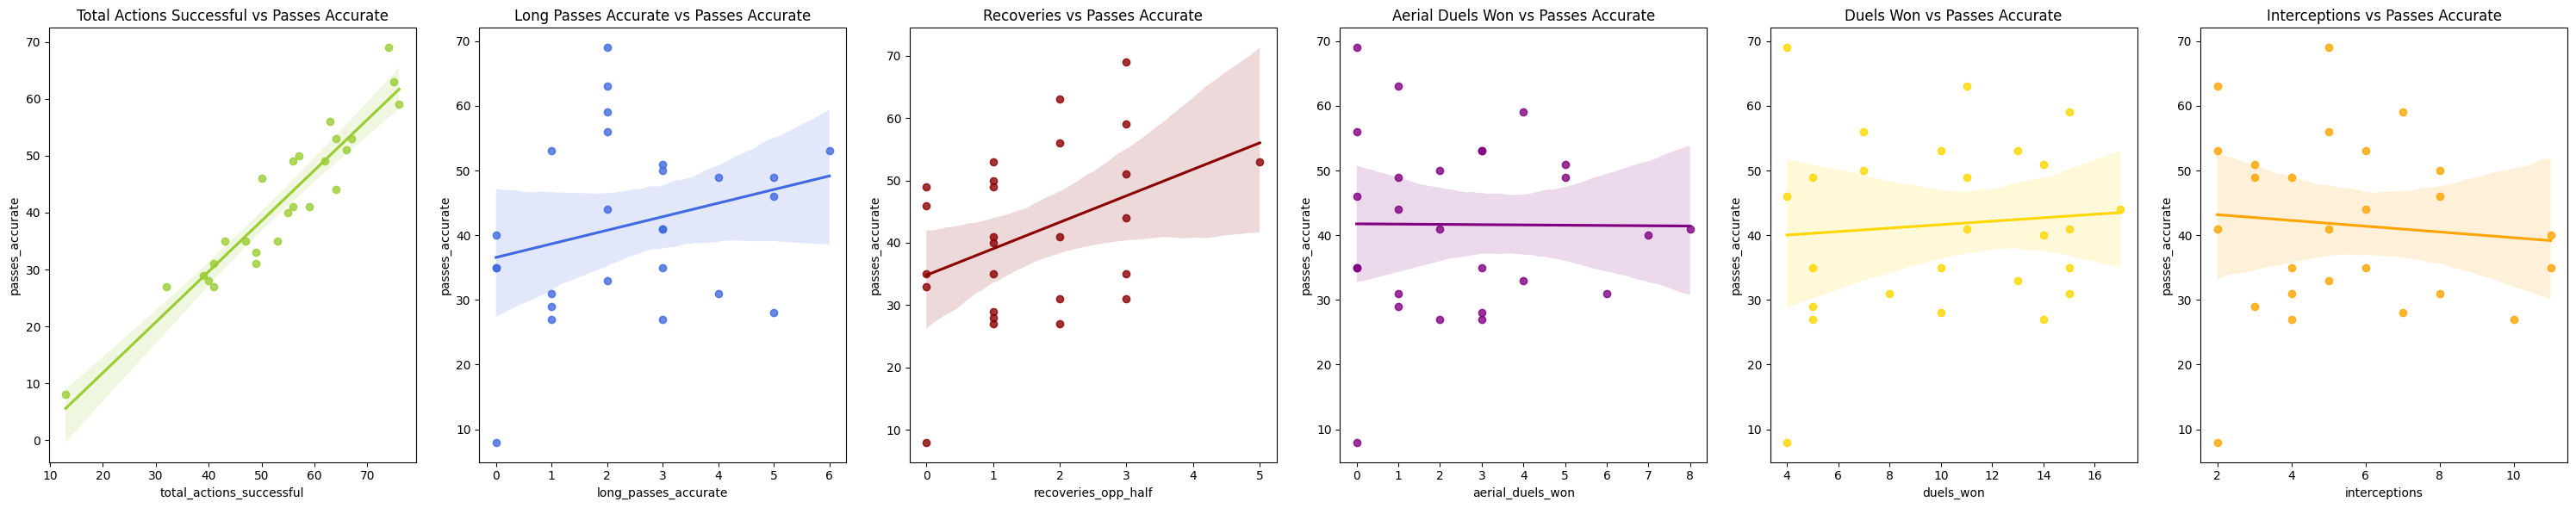

In [ ]:
# Defining the independent variables
X = normalized_df[['total_actions_successful', 'long_passes_accurate', 'recoveries_opp_half', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['passes_accurate']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 6))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('Recoveries vs Passes Accurate')

sns.regplot(x='aerial_duels_won', y='passes_accurate', data=normalized_df, ax=axs[3], color='purple')
axs[3].set_title('Aerial Duels Won vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, ax=axs[4], color='gold')
axs[4].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, ax=axs[5], color='orange')
axs[5].set_title('Interceptions vs Passes Accurate')

plt.tight_layout()
plt.show()

### Based on Duels Won

                            OLS Regression Results                            
Dep. Variable:              duels_won   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     70.62
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           5.15e-12
Time:                        19:21:38   Log-Likelihood:                -35.855
No. Observations:                  26   AIC:                             83.71
Df Residuals:                      20   BIC:                             91.26
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

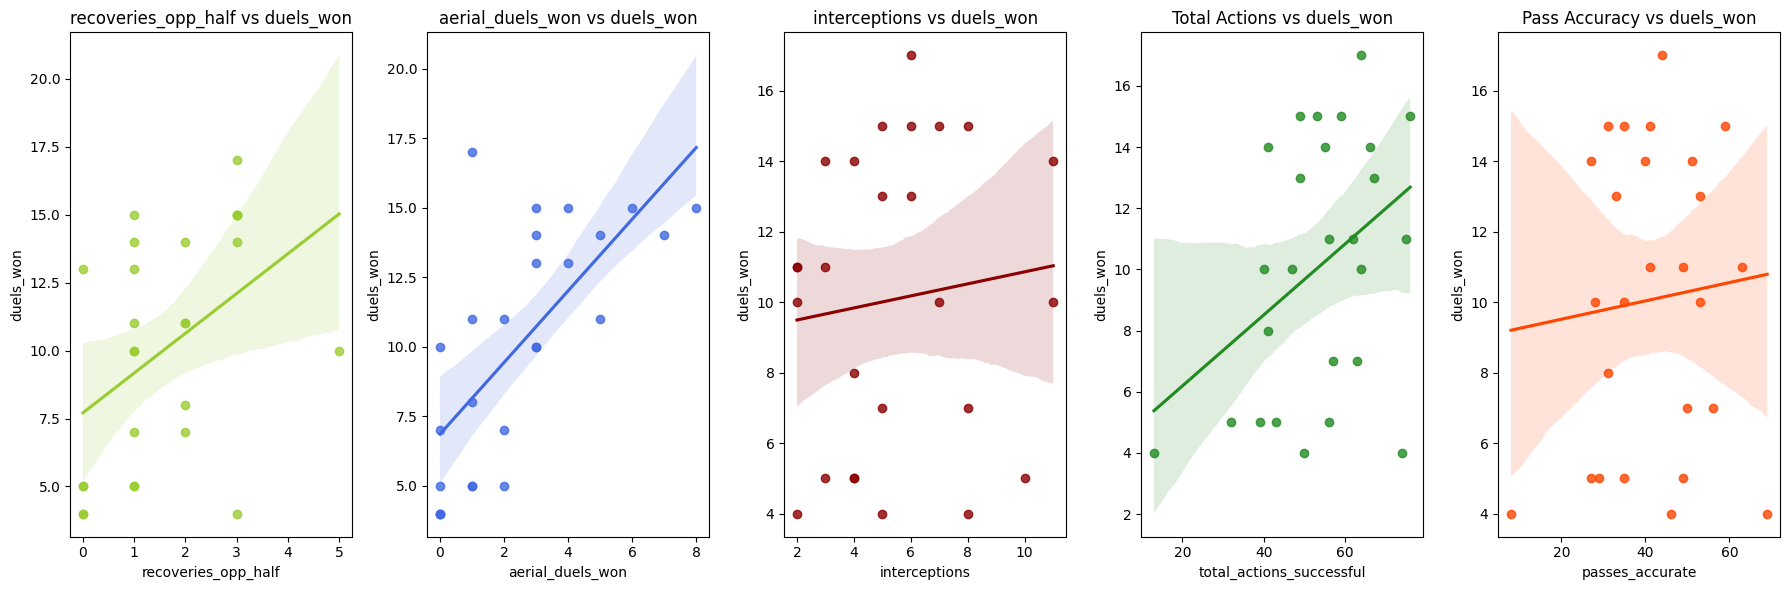

In [ ]:
# Defining the independent variables
X = normalized_df[['total_actions_successful', 'recoveries_opp_half', 'passes_accurate', 'aerial_duels_won', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['duels_won']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(18, 6))

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, ax=axs[0], color='yellowgreen')
axs[0].set_title('recoveries_opp_half vs duels_won')

sns.regplot(x='aerial_duels_won', y='duels_won', data=normalized_df, ax=axs[1], color='royalblue')
axs[1].set_title('aerial_duels_won vs duels_won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, ax=axs[2], color='darkred')
axs[2].set_title('interceptions vs duels_won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, ax=axs[3], color='forestgreen')
axs[3].set_title('Total Actions vs duels_won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, ax=axs[4], color='orangered')
axs[4].set_title('Pass Accuracy vs duels_won')

plt.tight_layout()
plt.show()

## Sci-kit Learn Linear Regression Models

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$


### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.9807782182296171
Coefficients:
recoveries_opp_half: -0.027858829019489748
long_passes_accurate: 0.11405374034698212
passes_accurate: 0.958996474796377
aerial_duels_won: -0.017779804553914036
duels_won: 1.1796589452027004
interceptions: -0.21419128861839207
losses_own_half: 0.10414362809169364
Mean squared error: 2.68
Coefficient of determination: 0.98


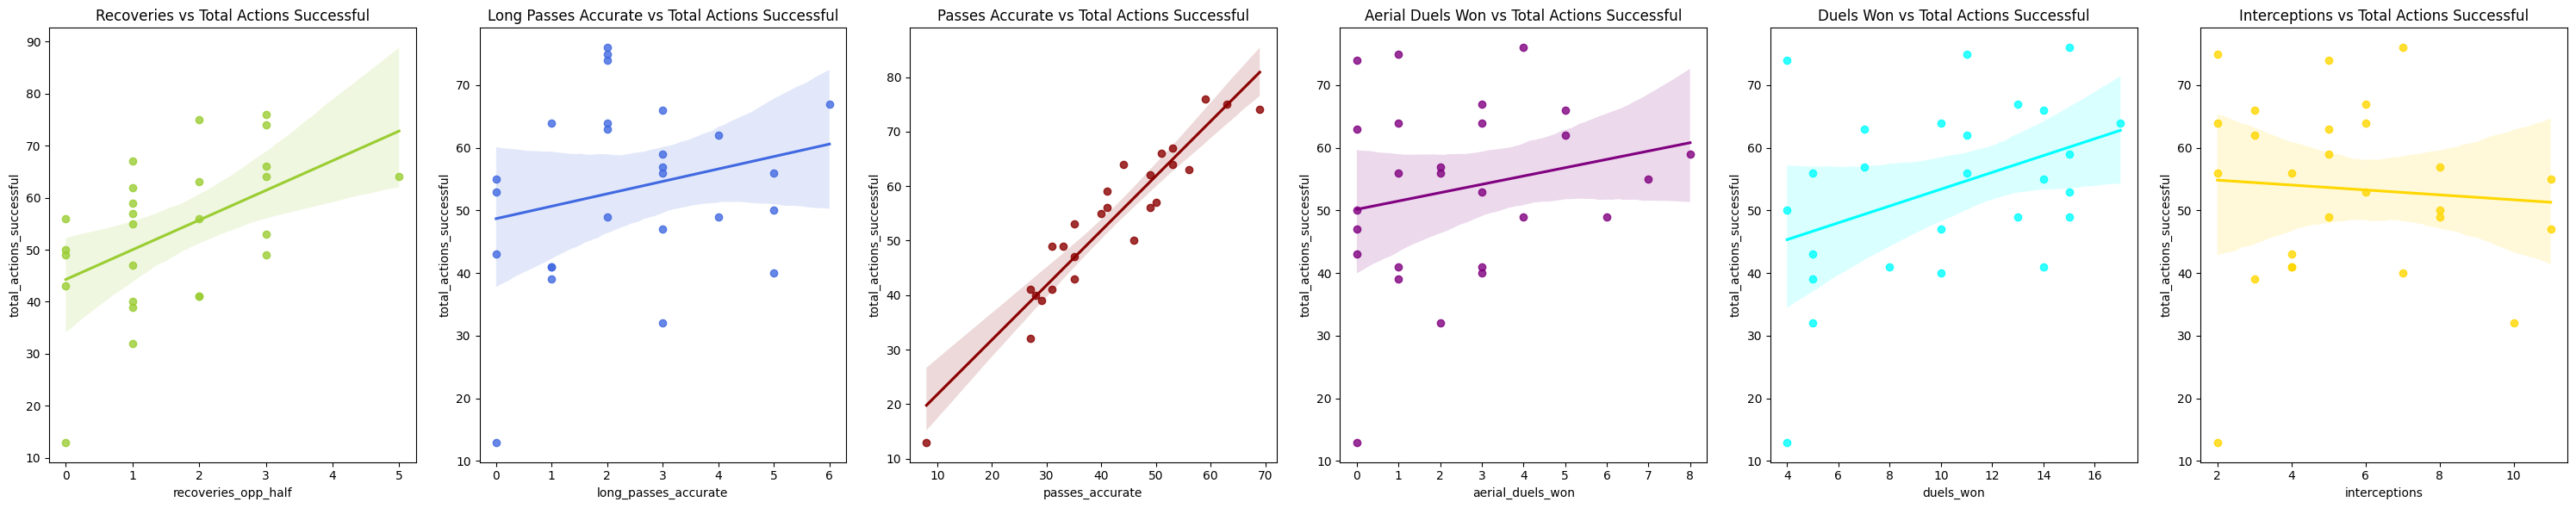

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Prepare the data
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 6))

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Recoveries vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='aerial_duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Aerial Duels Won vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='cyan', ax=axs[4])
axs[4].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[5])
axs[5].set_title('Interceptions vs Total Actions Successful')

plt.tight_layout()
plt.show()

Recoveries in Opponent's Half (-0.027): a negative coefficient, albeit a small one, suggests that more recoveries in the opponent's half could lead to a slight decrease in total successful actions. On football optics, Militão might be taking some calculated risks in the opponent's half, which might not always translate to successful actions.

Long Passes Accurate (0.11): Statistically, the positive coefficient indicates that with every accurate long pass, there's an increase in successful actions. On football optics, Militão showcases his distribution skills, turning defensive plays into potential attacking opportunities with his accurate long-range passes.

Passes Accurate (0.95): F this coefficient's high positive value highlights the strong correlation between accurate passing and Militão's overall successful actions. On football optics, Militão's ability to maintain possession and distribute the ball efficiently is a testament to his fundamental skills as a modern-day center-back.

Aerial Duels Won (-0.01): the negative coefficient, though slight, suggests that aerial duels might not significantly contribute to his overall successful actions. On football optics, while Militão is capable in the air, his broader game contributions aren't solely determined by aerial battles.

Duels Won (1.17): Statistically, this dominant positive coefficient demonstrates the substantial impact of winning duels on Militão's successful actions. On football optics, Militão's combative nature and ability to come out on top in one-on-one situations greatly enhance his defensive contributions.

Interceptions (-0.214): the negative coefficient indicates that increased interceptions might lead to a decrease in total successful actions. On football optics, this suggests that while Militão is proactive in intercepting plays, some of these might not translate directly into successful outcomes.

Losses in Own Half (0.10): Statistically, the positive value suggests that losing the ball in his own half might somewhat contribute to his total successful actions. On football optics, these losses might not necessarily be mistakes but could reflect Militão's willingness to take risks to drive plays forward.

Overall, the model boasts an impressive mean r^2 value of 0.98, implying that the features account for approximately 98% of the variance in Militão's total successful actions. The coefficient of determination, being at 0.98, further solidifies this, suggesting that the model is an excellent fit for the data. 

In summary, Eder Militão's performances are multi-dimensional, with successful actions influenced by a blend of his passing accuracy, dueling ability, and even the risks he takes in possession. His role as a modern defender combines traditional defensive responsibilities with an expectation to contribute to the build up play.

### Based on Pass Accuracy

Mean r^2 over all K-Fold folds: 0.9809367610173648
Coefficients:
total_actions_successful: 1.0320526034097592
long_passes_accurate: -0.0730178816548317
recoveries_opp_half: 0.1196608515966975
aerial_duels_won: 0.029583372557191054
duels_won: -1.227669340762472
interceptions: 0.22840756598016013
losses_own_half: -0.10674359160808973
Mean squared error: 2.64
Coefficient of determination: 0.97


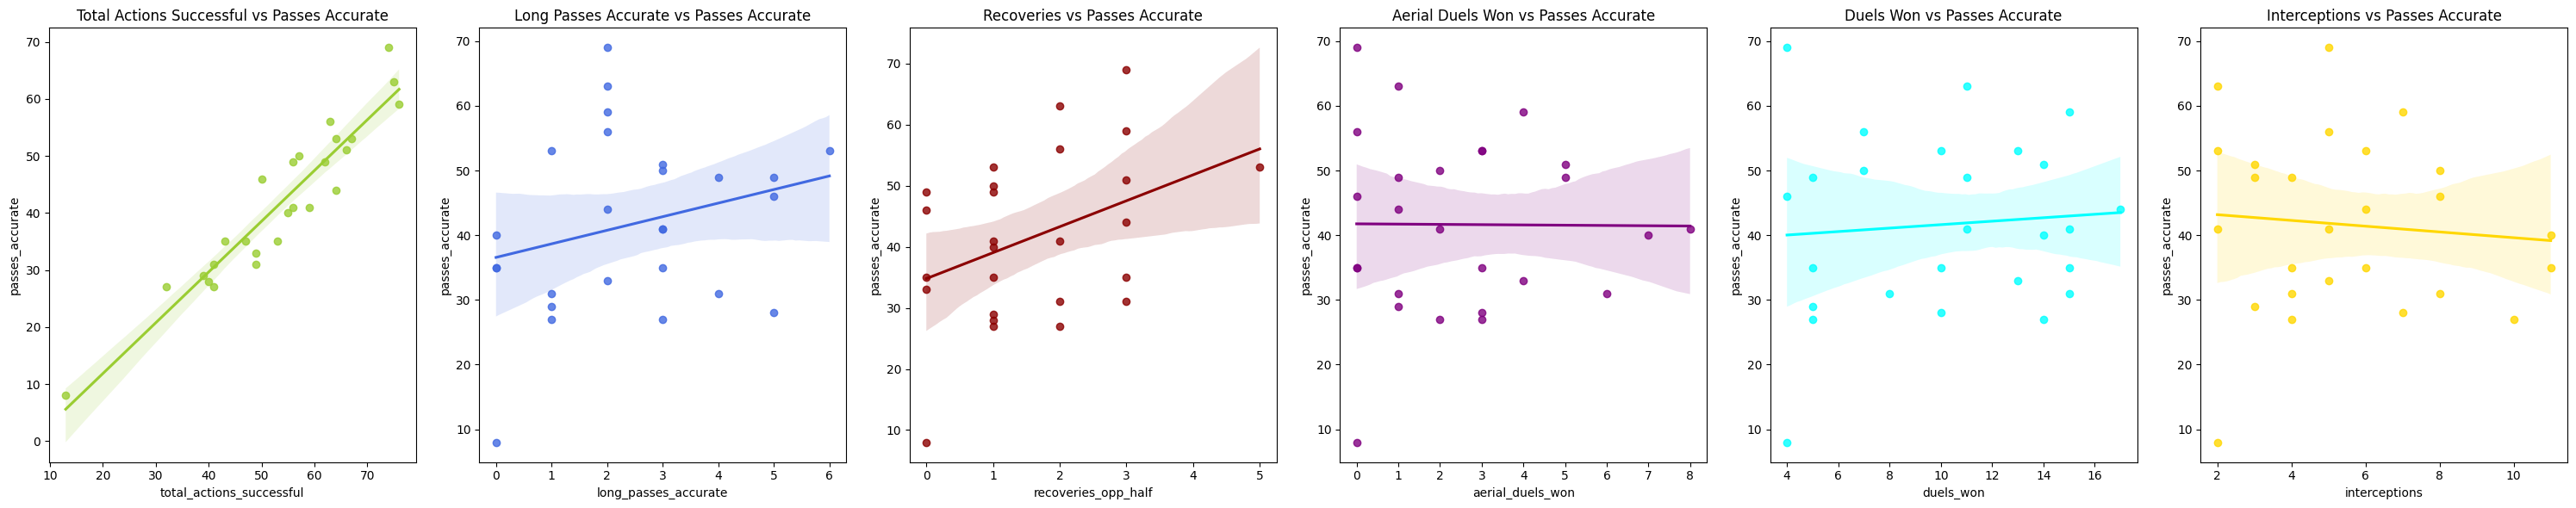

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'long_passes_accurate', 'recoveries_opp_half', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']]
y = normalized_df['passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'long_passes_accurate', 'recoveries_opp_half', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 6))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Recoveries vs Passes Accurate')

sns.regplot(x='aerial_duels_won', y='passes_accurate', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Aerial Duels Won vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='cyan', ax=axs[4])
axs[4].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, color='gold', ax=axs[5])
axs[5].set_title('Interceptions vs Passes Accurate')

plt.tight_layout()
plt.show()

Total Actions Successful (1.03): this strong positive coefficient underscores the direct relationship between Militão's overall successful actions and his passing accuracy. On football optics, when Militão is on his game, executing multiple successful actions, his precision in passing is palpable and often central to building play from the back.

Long Passes Accurate (-0.07): Statistically, the negative coefficient suggests that an increase in long pass accuracy might slightly decrease overall pass accuracy. On football optics, Militão, while adept at long-range distribution, could sometimes prioritize riskier long balls over maintaining consistent short-pass accuracy.

Recoveries in Opponent's Half (0.11): recoveries in the opponent's half have a moderate positive influence on pass accuracy. On football optics, Militão's forward recoveries likely allow him to make simpler passes, aiding his overall pass completion rate.

Aerial Duels Won (0.02): Statistically, winning aerial duels appears to have a marginal positive influence on pass accuracy. On football optics, this could represent Militão's ability to convert aerial duels into controlled ball possession, ensuring a seamless transition to accurate passing.

Duels Won (-1.22): Statistically, this substantial negative coefficient indicates that winning more duels might lead to decreased pass accuracy. On football optics, Militão, after engaging in intense duels, might make quicker decisions leading to less accurate passes in the aftermath.

Interceptions (0.22): the positive value indicates that interceptions contribute favorably to pass accuracy. On football optics, after an interception, Militão seems adept at ensuring the ball is played accurately to his teammates.

Losses in Own Half (-0.10): Statistically, this negative coefficient implies that more losses in his own half correlate with a slight decrease in pass accuracy. On football optics, these losses might disrupt Militão's rhythm, slightly affecting his subsequent pass choices.

Overall, with a mean r^2 value of 0.98, these features explain approximately 98% of the variance in Militão's pass accuracy, which is exceptionally high. The coefficient of determination at 0.97 signifies a nearly perfect fit, suggesting that these features robustly represent factors influencing Militão's pass accuracy.

In essence, Eder Militão's pass accuracy emerges from a harmonious blend of defensive prowess, game intelligence, and technical ability. While duels and losses present challenges, his overall success in actions and interception skills cements his position as an elite defender with commendable ball distribution capabilities.

### Based on Duels Won

Mean r^2 over all K-Fold folds: 0.833371651991398
Coefficients:
total_actions_successful: 0.7918847863868615
recoveries_opp_half: 0.05258868614865342
long_passes_accurate: -0.7652344214886565
passes_accurate: 0.21602473177837947
aerial_duels_won: 0.02674966344441127
Mean squared error: 1.48
Coefficient of determination: 0.91


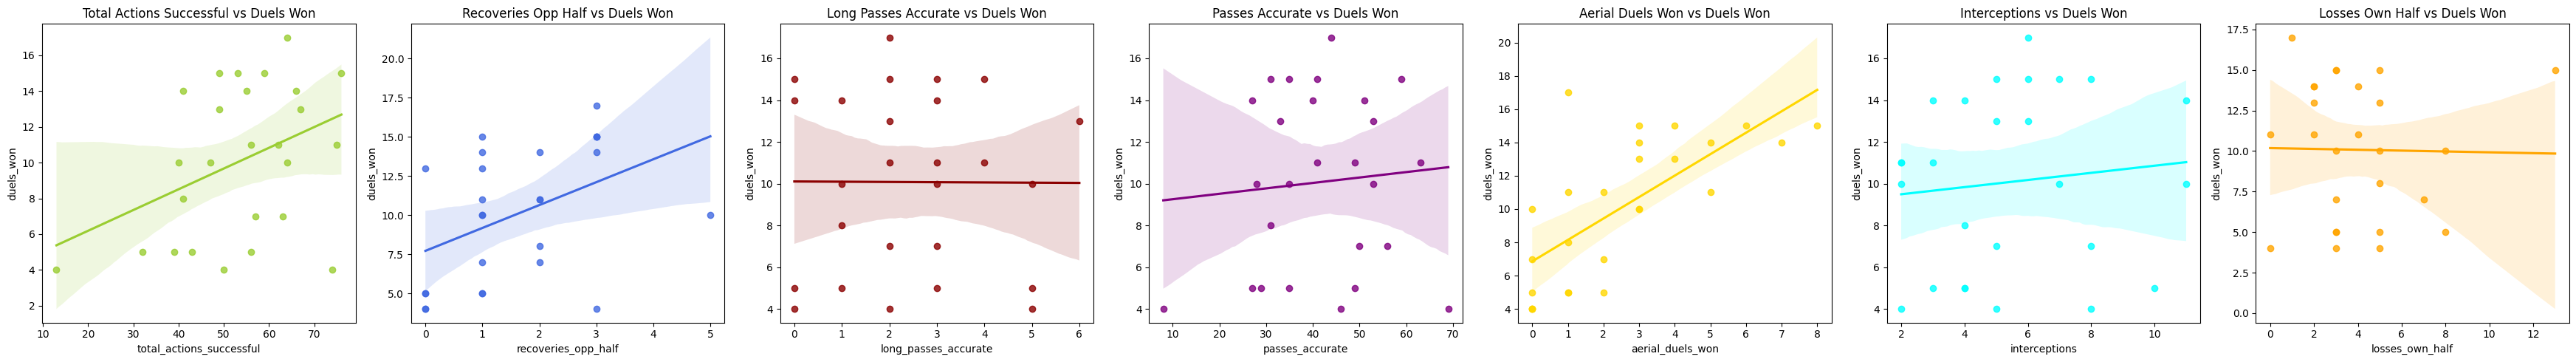

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'recoveries_opp_half',  'passes_accurate', 'aerial_duels_won', 'losses_own_half']]
y = normalized_df['duels_won']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'aerial_duels_won', 'interceptions', 'losses_own_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, figsize=(35, 5))

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Recoveries Opp Half vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Long Passes Accurate vs Duels Won')

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='aerial_duels_won', y='duels_won', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Aerial Duels Won vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Interceptions vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='orange', ax=axs[6])
axs[6].set_title('Losses Own Half vs Duels Won')

plt.tight_layout()
plt.show()

Total Actions Successful (0.79): this strong positive coefficient accentuates that Militão's total successful actions significantly contribute to the duels he wins. On football optics, when Militão is performing well and involving himself in multiple successful actions, it's evident in his confidence and ability to dominate duels.

Recoveries in Opponent's Half (0.05): Statistically speaking, a modest positive coefficient indicates that recoveries made in the opponent's half have a slight influence on the duels Militão wins. On football optics, Militão's forward-pressing style means he's not just winning the ball back but also setting the tone higher up the pitch.

Long Passes Accurate (-0.76): this negative coefficient suggests that more accurate long passes correlate with fewer duels won. On football optics, when Militão is focusing more on long-range distribution, he might be engaging less in ground duels as he's facilitating play from the back.

Passes Accurate (0.21): Statistically, this coefficient implies that accurate passing somewhat contributes to the number of duels won. On football optics, this paints Militão as not just a ball-playing defender but also as someone who uses his passing to position himself better for confrontations.

Aerial Duels Won (0.02):  the positive value, albeit small, implies that winning aerial duels has a mild influence on the overall duels Militão wins. On football optics, this represents Militão's proficiency in air, ensuring he's not easily beaten when the ball's off the ground.

Overall, with a mean r^2 value of 0.83, these features explain about 83% of the variance in Militão's duels won, an impressively high proportion. The coefficient of determination being at 0.91 signals that the model aptly captures the relationship between the features and Militão's performance in duels.

Overall, Eder Militão's dueling prowess isn't just about physical confrontations. It encompasses his overall gameplay, from successful actions to intelligent passing. This multi-faceted approach to defense showcases his value as a complete modern defender.

## XGBoost & Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.

### Based on Total Actions

Mean cross-validation score: 0.64
MAE: 3.21113920211792
MSE: 12.85948774443932
R^2: 0.9045235248672718


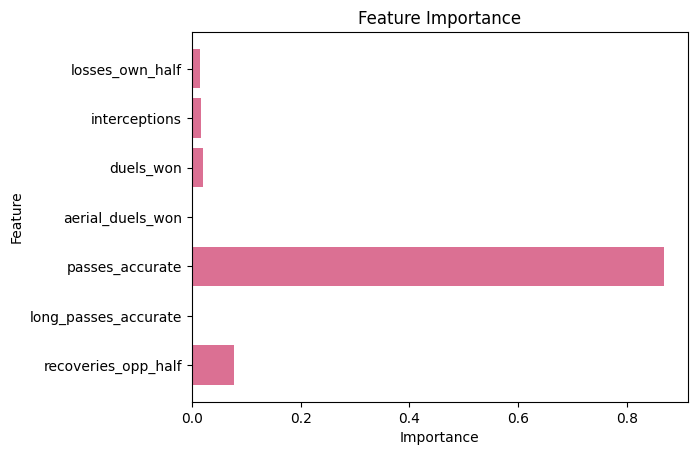

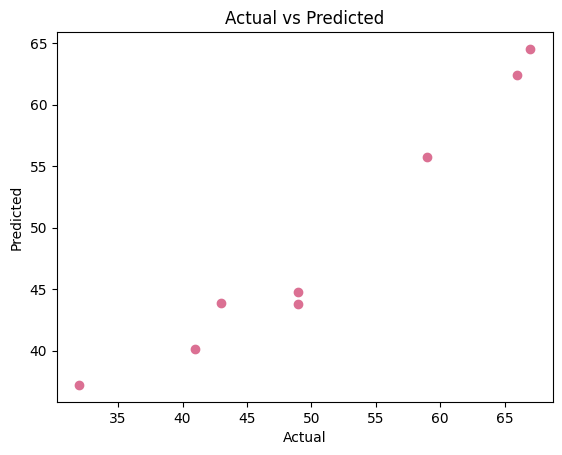

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'aerial_duels_won', 'duels_won', 'interceptions', 'losses_own_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='palevioletred') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='palevioletred')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Mean Cross-Validation Score (0.64): the mean cross-validation score of 0.64 indicates that the model is reasonably well-fitted. Cross-validation helps assess how the model performs on unseen data, and a score closer to 1 would mean better generalization. On football optics: This score translates to the ability of the model to capture various aspects of Militão's game, such as defensive skills, passing accuracy, and overall contribution, though there's room for improvement.

Mean Absolute Error (MAE: 3.2111): the MAE measures the average absolute errors between the predicted and actual values. A lower MAE is generally desirable, so 3.2111 suggests a decent fit but indicates there are still some discrepancies. On football optics: This error value tells us that while the model has captured some essential parts of Militão's performance, it may still overlook some nuances of his playing style.

Mean Squared Error (MSE: 12.8595): MSE is another measure of the model's accuracy, and a lower value is preferred. The value of 12.8595, although higher than the MAE, still provides an acceptable indication of the model's predictive accuracy. On football optics: The MSE might signify that the model is capturing broad strokes of Militão's game but could miss some intricate details that are key to a complete understanding of his performance.

Coefficient of Determination (R^2: 0.9045):The R^2 score close to 0.9 indicates that approximately 90% of the variance in the dependent variable is predictable from the features in the model, showing a strong relationship. On football optics: This strong R^2 score emphasizes that the selected features in the model are likely capturing the essential elements of Militão's game, and that this statistical analysis provides a robust understanding of his contribution to the team.

The XGBoost & Cross-Validation model provides a comprehensive and insightful understanding of Eder Militão's performance, showcasing his strengths and areas of improvement. The high R^2 value highlights the model's ability to encapsulate the complex interplay of different features in Militão's play. On football optics, these results underline Militão's overall proficiency, while also pointing to the intricate and multifaceted nature of football analysis, where some nuances might require more in-depth examination.

### Based on Pass Accuracy

Mean cross-validation score: 0.76
MAE: 2.799091339111328
MSE: 10.955862449569395
R^2: 0.8788570841789147


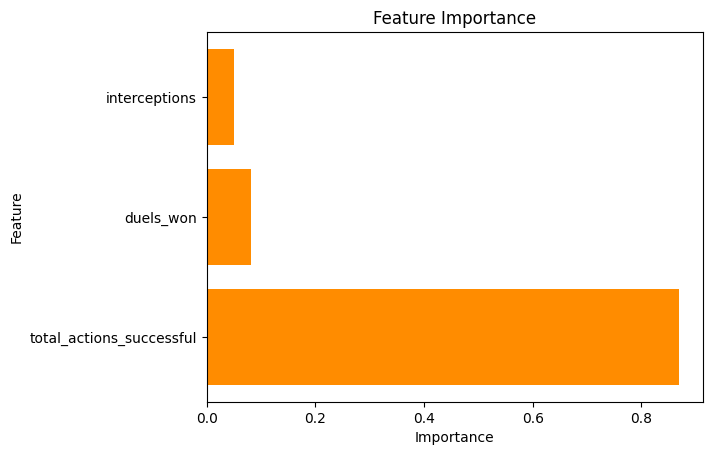

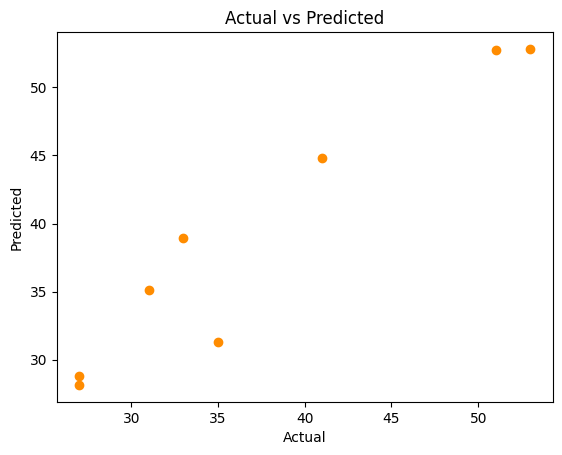

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'duels_won', 'interceptions']]
y = normalized_df['passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error (MAE) (2.79): the model's predictions deviate from the actual values by roughly 2.8 units. Depending on the scale and context of the data, this can be seen as moderate or significant. For example, if pass accuracy is measured in percentages, then a deviation of 2.8% can be considerable. On football optics, An error margin of around 2.8% in pass accuracy can be substantial. Given the importance of retaining possession in modern football, especially for a central defender like Militão, accurate passing is crucial. This margin might suggest there are matches where he's not as accurate as predicted or vice versa.

Mean Squared Error (MSE) (10.9): is a measure of the model's variance. In essence, this value gauges the squared differences between predicted and actual pass accuracy values. This seems high, especially when paired with the MAE, hinting at potential outliers or instances where the model misses the mark considerably. On football optics, This further emphasizes the inconsistency in predicting Militão's pass accuracy. Such variability could be due to factors like opposition pressing, pitch conditions, or the tactical setup of Real Madrid in specific matches.

Coefficient of Determination (R^2) (0.87): the model can explain approximately 88% of the variance in Militão's pass accuracy. This is commendable as it suggests a strong fit between the model's predictions and the actual data. On football optics, This implies that the majority of Militão's passing patterns and accuracy can be quantified and predicted. It accentuates his consistency in distribution and the key role he plays in building plays from the back.

Cross-Validation Mean Score (0.76): is positive, indicating that the model has a good predictive ability on unseen data. It reinforces the confidence in the model's capability to generalize beyond the training set. On football optics, This highlights that Militão's pass accuracy across different matches, against varied opponents, and in numerous tactical contexts, can be anticipated with a reasonable degree of accuracy.

In summary, the XGBoost Regressor Model for Eder Militão based on "Pass Accuracy" showcases a robust understanding of his passing patterns and capabilities. While the errors, especially the MAE, indicate some discrepancies, the high R^2 and cross-validation scores suggest the model's general strength. In a footballing context, it paints a picture of Militão as a central defender with a notable ability in ball distribution, whose passing performance can be fairly accurately predicted with the right features.

### Based on Duels Won

Mean cross-validation score: 0.19
MAE: 3.399541139602661
MSE: 15.190803030757024
R^2: 0.03166195819875539


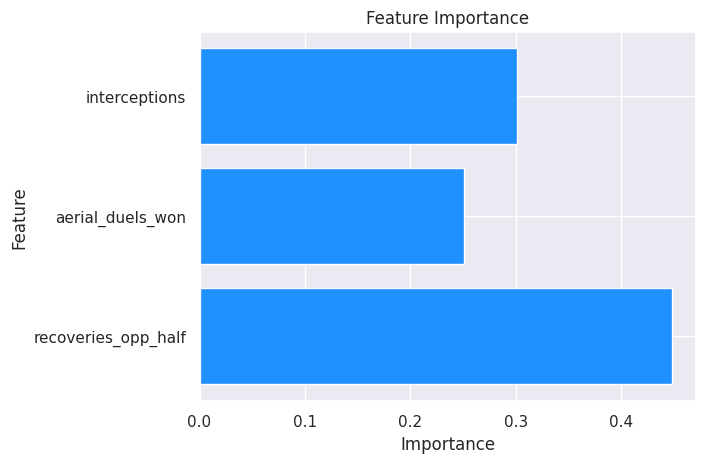

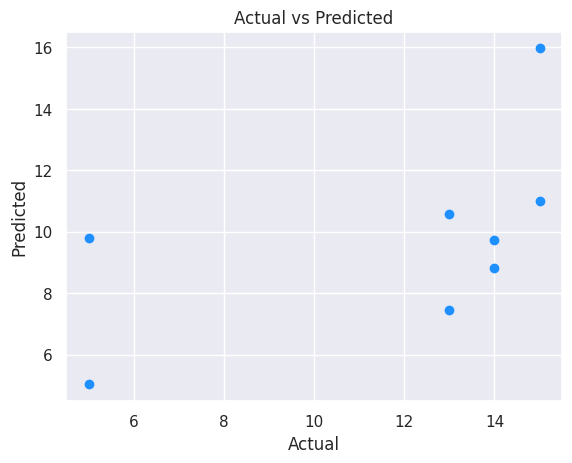

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half',  'aerial_duels_won', 'interceptions']]
y = normalized_df['duels_won']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='dodgerblue') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='dodgerblue')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Conformal Predictions

#### Provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 57.07%
Average prediction interval width: 3.97


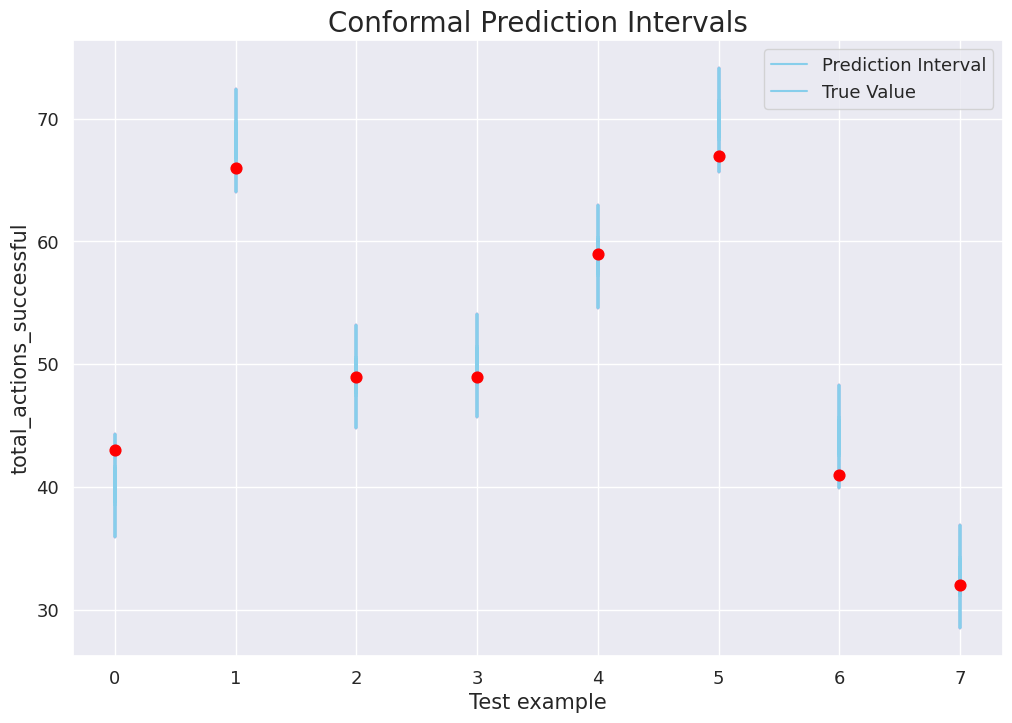

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['long_passes_accurate', 'passes_accurate', 'duels_won', 'interceptions', 'losses_own_half']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model 
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5) 

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (57.07%): is a tad on the lower side. This suggests that the model's predictions are encompassing the true outcomes of Militão's total actions just a little more than half the time. With this rate, there's significant room for improvement. It would be pertinent to investigate the reasons behind the model's reduced accuracy in capturing Militão's total actions. This could involve checking for data quality issues, exploring additional or different feature sets, or possibly re-evaluating the model choice and parameters. On football optics, could indicate a degree of unpredictability or variability in Militão's on-field activities. This might suggest that Militão's involvement in a match, in terms of total actions, can be influenced by various factors—whether it's the tactical approach, the nature of the opposition, or specific match scenarios.

Average prediction interval width (3.97): when associated with the mentioned coverage, indicates a moderate level of precision in the model's predictions for Militão's total actions. The width shows that the model is providing a relatively broad range for expected outcomes, which could be an attempt to capture the inherent variability in Militão's game. While a certain level of prediction interval width is expected, it might be worth exploring if there are ways to refine this for greater precision without compromising the model's generalizability. On football optics, illustrates the range of variability in Militão's involvement in matches. This suggests that depending on various match factors, Militão's overall contributions might swing within this interval. Such an interval can be seen as a testament to a player's adaptability, potentially adjusting his involvement based on the tactical needs of a given game.

In summary, the conformal prediction outcomes for Eder Militão's "Total Actions" highlight both the model's areas for refinement and the player's dynamic role in games. The results underscore the need for possible model adjustments to better capture Militão's performance nuances.

### Based on Pass Accuracy

Prediction interval coverage: 58.84%
Average prediction interval width: 4.10


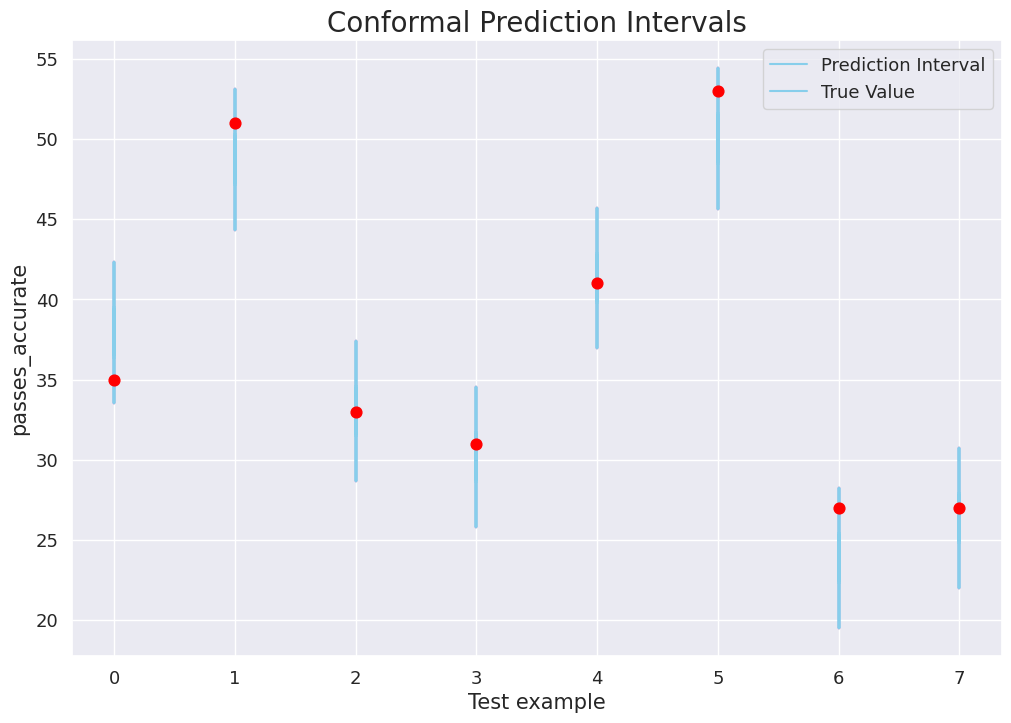

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['total_actions_successful', 'long_passes_accurate', 'duels_won', 'interceptions', 'losses_own_half']]
y = normalized_df['passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model 
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5) 

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('passes_accurate', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (58.84%): remains slightly below optimal. This suggests that the model's predicted intervals are correctly capturing Militão's actual pass accuracy outcomes just under 60% of the time. Such a rate indicates that the model might not be capturing all the nuances of Militão's passing game or that there might be external factors at play affecting the pass accuracy which the model isn't accounting for. It would be worth diving deeper to understand what's causing this deviation and consider refining the model accordingly.On football optics, suggests that Militão's passing in matches can be affected by several variables. Whether it's the pressure from the opposition, the match scenario, or perhaps the pitch conditions, his pass accuracy seems to exhibit some variability. This emphasizes the dynamic nature of a live game and the challenges defenders like Militão face when trying to maintain consistent pass accuracy.

Average prediction interval width (4.10):indicates a reasonable level of variability in the model's predictions for Militão's pass accuracy. The relatively broad width might be the model's attempt to accommodate the unpredictable aspects of Militão's passing game. While the width provides a window into the range of potential outcomes, it would be beneficial to understand what factors contribute to this width and if the model can be fine-tuned to narrow it down without sacrificing too much coverage. On football optics, points to a variation in Militão's passing performance across matches. This could be indicative of the challenges he faces during different match situations. Whether dealing with high-press scenarios, attempting long balls, or playing out from the back, the range suggests that Militão's passing is adaptable, albeit with some variations in accuracy.

To wrap up, the conformal prediction outcomes for Eder Militão's "Pass Accuracy" give insights into both his passing capabilities and the model's precision in predicting this specific attribute. There's room for enhancement in the model to more accurately mirror Militão's on-pitch contributions.

### Based on Duels Won

Prediction interval coverage: 58.84%
Average prediction interval width: 3.90


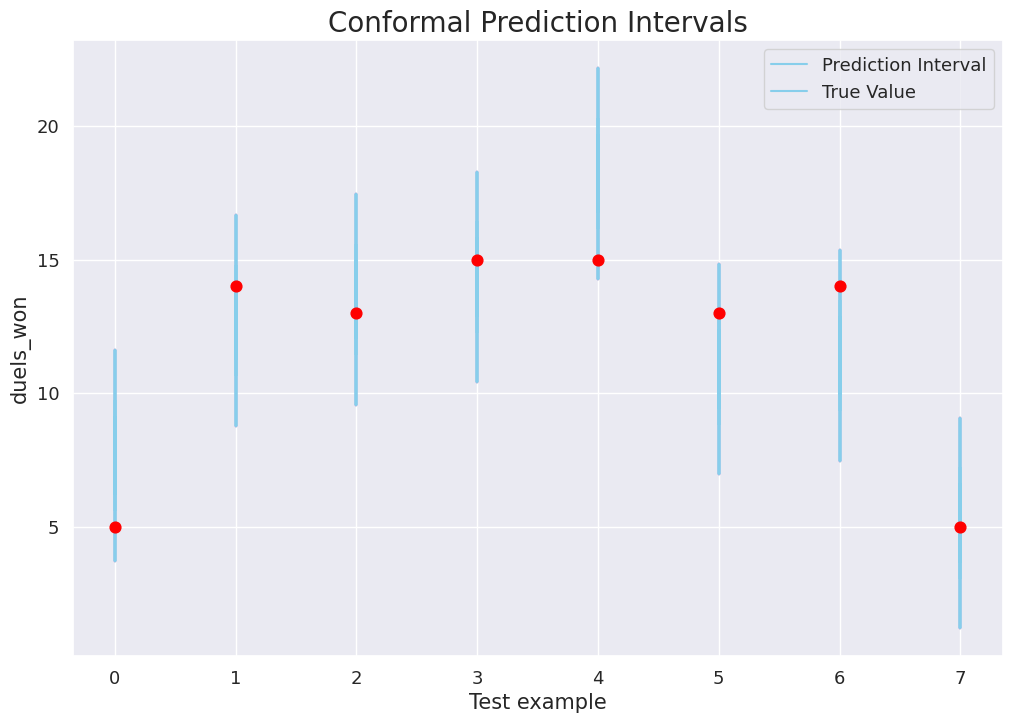

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['total_actions_successful', 'recoveries_opp_half', 'long_passes_accurate','passes_accurate', 'aerial_duels_won','losses_own_half']]
y = normalized_df['duels_won']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5) 

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('duels_won', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (58.84%): suggests that the model has room for improvement. Ideally, we'd want this value to be higher to increase our confidence in the model's predictions. This rate indicates that Militão's actual duel outcomes are within the model's predicted range just above half the time. This might necessitate a deeper exploration into the dataset, possibly accounting for other situational variables that influence duels, or fine-tuning the model for better results.On football optics, highlights the inherent unpredictability and variability in one-on-one situations on the pitch. It might imply that Militão's success rate in duels varies based on different factors like the quality of the opponent, the nature of the match, or his own physical and mental state during the game.

Average prediction interval width (3.90): when juxtaposed with the coverage rate, indicates a certain variability in the model's predictions concerning Militão's duels. The width provides a range in which we can expect Militão's actual duels won to fall, but the broader the interval, the less precise our predictions become. Given the inherent challenges in predicting dynamic on-field situations like duels, this width might be understandable, but there's value in investigating if the model can be more precise. On football optics, an average prediction interval width of 3.90 for "Duels Won" offers a window into the range of Militão's on-field duel performance across matches. It suggests that depending on the nature of the game and the opposition, Militão's success in one-on-one situations might fluctuate within this band. This can be seen as evidence of the complexities of defensive play, where various factors can influence the outcome of individual duels.

In essence, while Eder Militão's conformal prediction outcomes for "Duels Won" show some alignment with his on-pitch duel performance, the model might benefit from some refinement to better capture these on-field dynamics. 

## Radar Map Visualization

### Militão Performance PSG 2nd Leg (2022)

- Total Actions Success (TAS): 66%

- Passes Accurate (PA): 87%

- Long Passes Accurate 25%

- Duels Won (DW): 61%

- Aerial Duels Won (ADW): 100%

- Losses (LOH): 67%

- Recoveries (ROPH): 29%

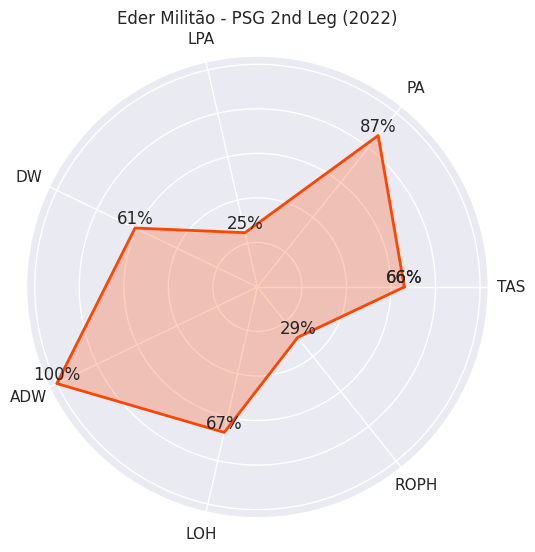

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([66, 87, 25, 61, 100, 67, 29])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Eder Militão - PSG 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Militão Performance Chelsea 1st Leg (2022)

- Total Actions Success (TAS): 71%

- Passes Accurate (PA): 78%

- Long Passes Accurate 17%

- Duels Won (DW): 56%

- Aerial Duels Won (ADW): 100%

- Losses (LOH): 71%

- Recoveries (ROPH): 20%

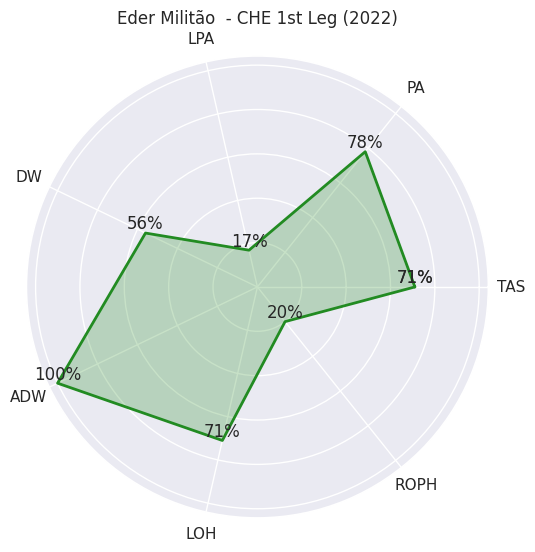

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([71, 78, 17, 56, 100, 71, 20])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Eder Militão  - CHE 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='forestgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='forestgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Militão Performance Man City 2nd Leg (2022)

- Total Actions Success (TAS): 63%

- Passes Accurate (PA): 85%

- Long Passes Accurate 30%

- Duels Won (DW): 41%

- Aerial Duels Won (ADW): 33%

- Losses (LOH): 25%

- Recoveries (ROPH): 22%

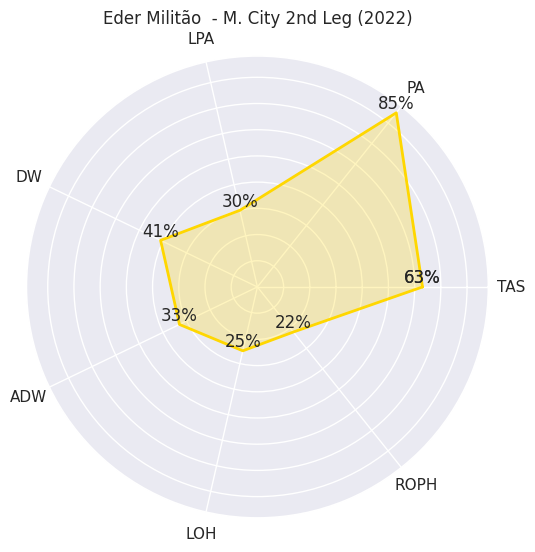

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([63, 85, 30, 41, 33, 25, 22])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Eder Militão  - M. City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Militão Performance Final (2022)

- Total Actions Success (TAS): 77%

- Passes Accurate (PA): 90%

- Long Passes Accurate 50%

- Duels Won (DW): 68%

- Aerial Duels Won (ADW): 100%

- Losses (LOH): 50%

- Recoveries (ROPH): 7%

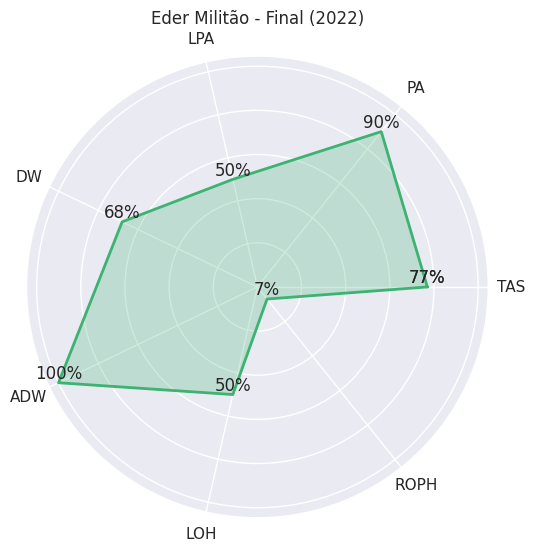

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([77, 90, 50, 68, 100, 50, 7])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Eder Militão - Final (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='mediumseagreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='mediumseagreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Militão Performance Liverpool 1st Leg (2023)

- Total Actions Success (TAS): 77%

- Passes Accurate (PA): 88%

- Long Passes Accurate 71%

- Duels Won (DW): 71%

- Aerial Duels Won (ADW): 100%

- Losses (LOH): 50%

- Recoveries (ROPH): 0%

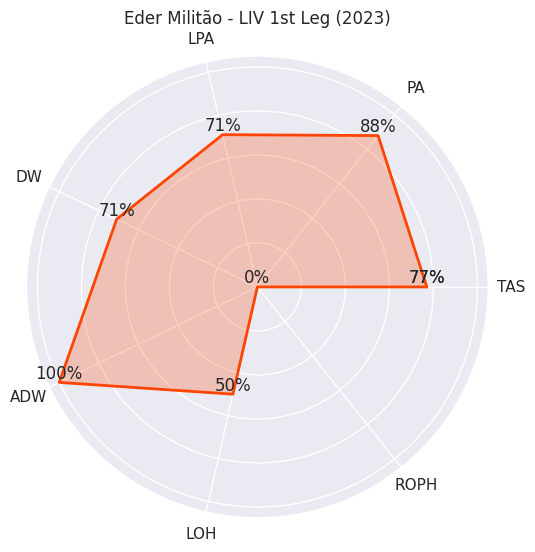

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([77, 88, 71, 71, 100, 50, 0])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Eder Militão - LIV 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Militão Performance Man City 2nd Leg (2023)

- Total Actions Success (TAS): 71%

- Passes Accurate (PA): 85%

- Long Passes Accurate 67%

- Duels Won (DW): 68%

- Aerial Duels Won (ADW): 80%

- Losses (LOH): 40%

- Recoveries (ROPH): 0%

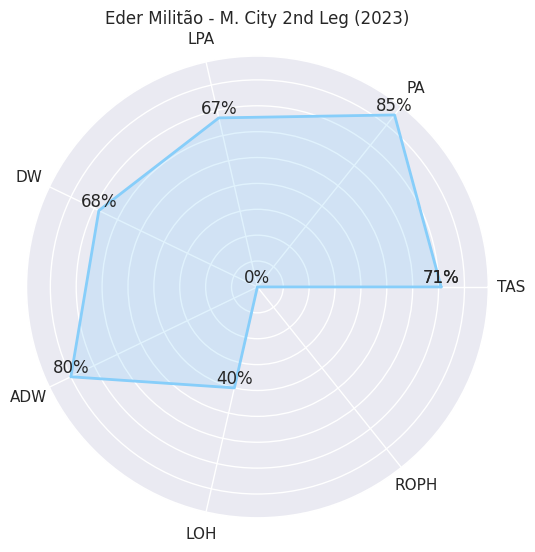

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'ADW','LOH', 'ROPH'])
stats = np.array([71, 85, 67, 68, 80, 40, 0])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Eder Militão - M. City 2nd Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='lightskyblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='lightskyblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f538f9cc-ab6c-476e-a8dd-c5919415e705' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>